# Part 1- Regression Analysis 


## Table of contents:
1. [The Big Picture](#ab)
2. [Get the data](#ab1)
    1. [Exploratory data analysis](#ab2)
    2. [Bivariate analysis](#ab3)
3. [Prepare data for Machine learning Algorithms](#ab4)
  1. [Data cleaning- checking for missing values](#ab5)
  2. [Handling categorical variables](#ab6)
  3. [Scaling and splitting the dataset](#ab7)  
4. [Modeling- Selecting, triaining and optimizing](#ab8)
  1. [Lasso regression and feature importance](#ab9)
  2. [Linear regression using normal equation](#ab10)
  3. [KNN regression ](#ab11)
  4. [Ridge regression](#ab12)
  5. [Polynomial regression](#ab13)
  6. [Support vector machine(linear)](#ab14)
  7. [ Support vector Machine(Using Linearsvc)](#ab15)
  8. [Support vector machine(poly)](#ab16)
  9. [Support vector machine(rbf)](#ab17)
5. [Results and model evaluation ](#ab18)
  1. [Further improvements](#ab19)

<a id='ab'></a>
## 1.The Big picture:
###### Data Set Information:
The objective of this section is to predict Salesprices of houses.This notebook is going to be focused on solving the problem of predicting house prices for house buyers and house sellers.A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. 

There are two csv files to present data- Train and test csv's. I have merged these two datasets into one dataframe. We will consider Saleprice as target columns for regression tasks.


###### Relevant Papers and Acknowledgements:
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset


<a id='ab1'></a>
##  2. Get the data
###### Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('House prices_raw.csv')

<a id='ab2'></a>
### 2.1 Exploratory data analysis


In [12]:
#### Head of the dataset 
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
#### lets look at the shape of the dataset 
data.shape

(2919, 81)

In [14]:
##Lets look at the datatypes present in the dataset
data.dtypes.value_counts()

object     43
int64      27
float64    11
dtype: int64


 ###### Insights : At an overall view before preproccesing, We have 43 categorical/ordinal columns and 38 numerical columns

In [8]:
###Lets look at the Missing values
data.isnull().values.sum()
total_datapoints = len(data.columns)* len(data)

##Total percentage of missing values across the dataset
data.isnull().values.sum()/(total_datapoints)*100

5.906386002309263

###### To summarize the dataset has:
1. 2919 features(rows)
2. 81 features(columns)
3. 43 categorical/ordinal columns and 38 numerical columns
4. 6% of missing values across the dataset

In [20]:
##Further lets see how these values are missing across columns
total_miss = data.isnull().sum()
perc_miss = total_miss/data.isnull().count()*100
perc_miss
missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data = missing_data.sort_values(by='Total missing',
                         ascending=False).head(20)

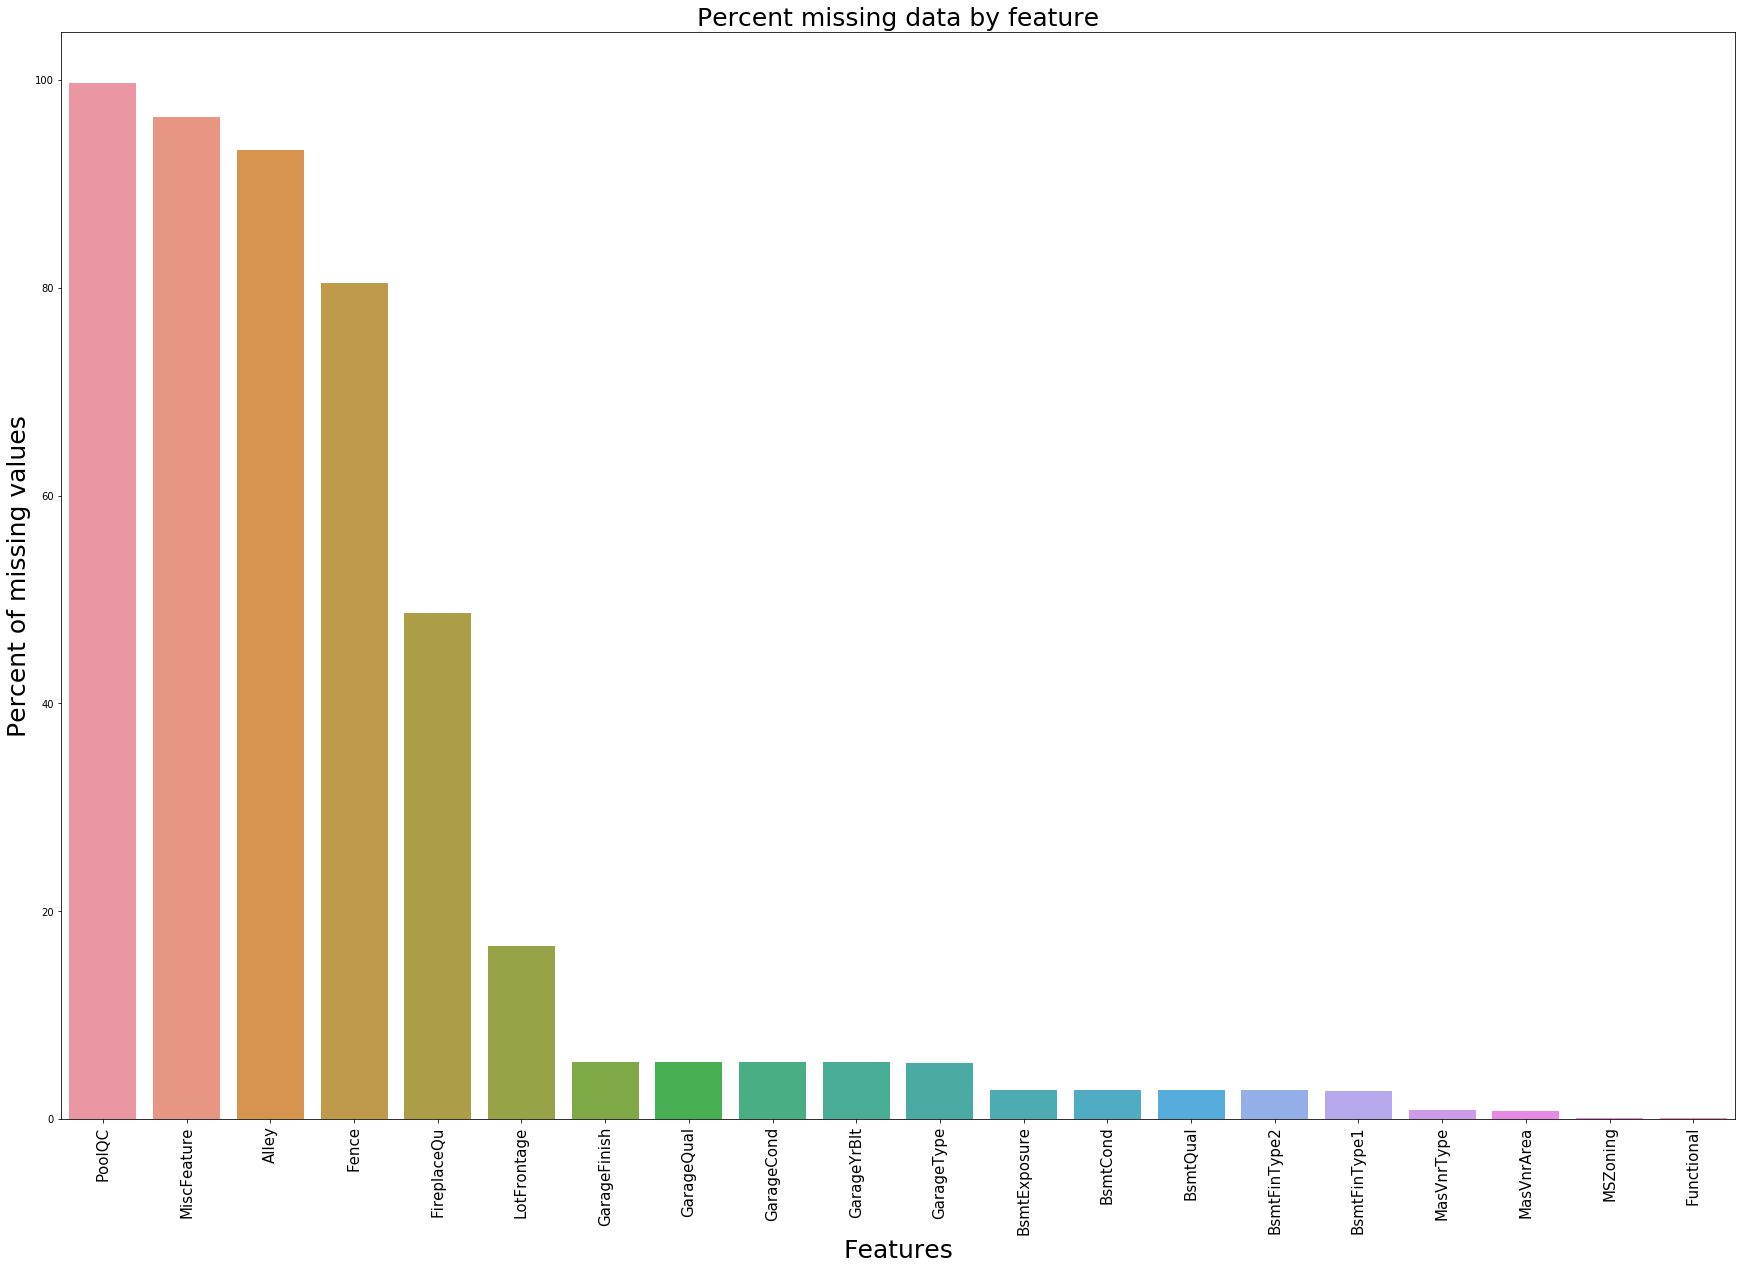

In [24]:
#Lets visualise the missing features
sns.barplot(x=missing_data.index,y= missing_data.iloc[:, 1])
plt.xticks(rotation='90',fontsize=15)
plt.xlabel('Features', fontsize=25)
plt.ylabel('Percent of missing values', fontsize=25)
plt.title('Percent missing data by feature', fontsize=25)
plt.rcParams["figure.figsize"] = (30,20)

###### Insights: The highest missing values are from PoolQC, Miscfeature, Alley, Fence, LotFrontage

In [25]:
##The target variable here is sale prices- lets visualise to see how the distribution looks
data['SalePrice'].describe()

count      2919.000000
mean     180052.858171
std       57381.564586
min       34900.000000
25%      154795.000000
50%      176735.000000
75%      191896.000000
max      755000.000000
Name: SalePrice, dtype: float64

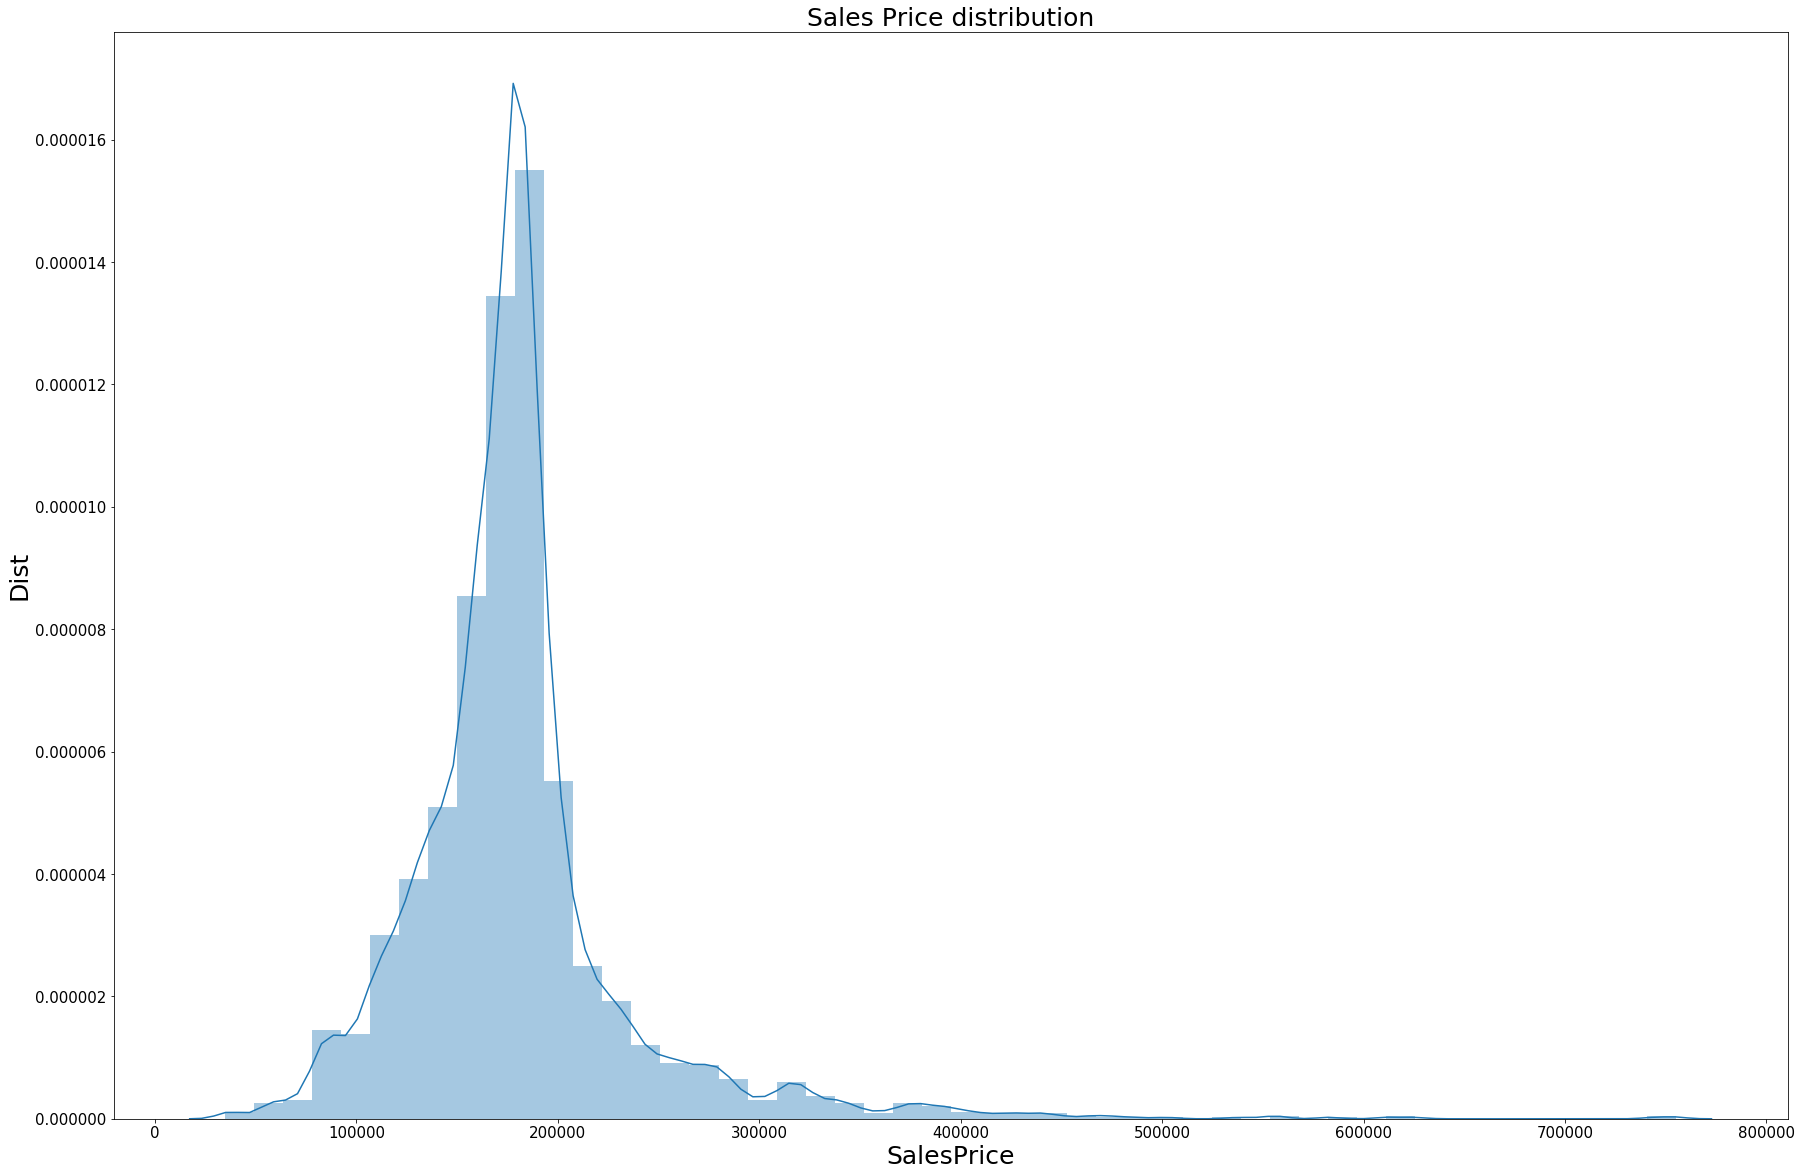

In [32]:
##Looking at the distribution of salesprice 
sns.distplot(data['SalePrice'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('SalesPrice', fontsize=25)
plt.ylabel( 'Dist',fontsize=25)
plt.title('Sales Price distribution', fontsize=25)
plt.rcParams["figure.figsize"] = (30,20)

###### Insights: From the graph we can see that salesprice is positively skewed which means that mean is greater than the mode 

In [104]:
##Subset the ID aside
ID = data['Id']
data = data.drop(['Id'],axis=1)

<a id='ab3'></a>
### 2.2 Bivariate analysis:
Lets see how and what affects my sale price - some of the factors that I can think of affecting sale price is Lotarea,Total Basement area which are numerical variables
       

(0, 50000)

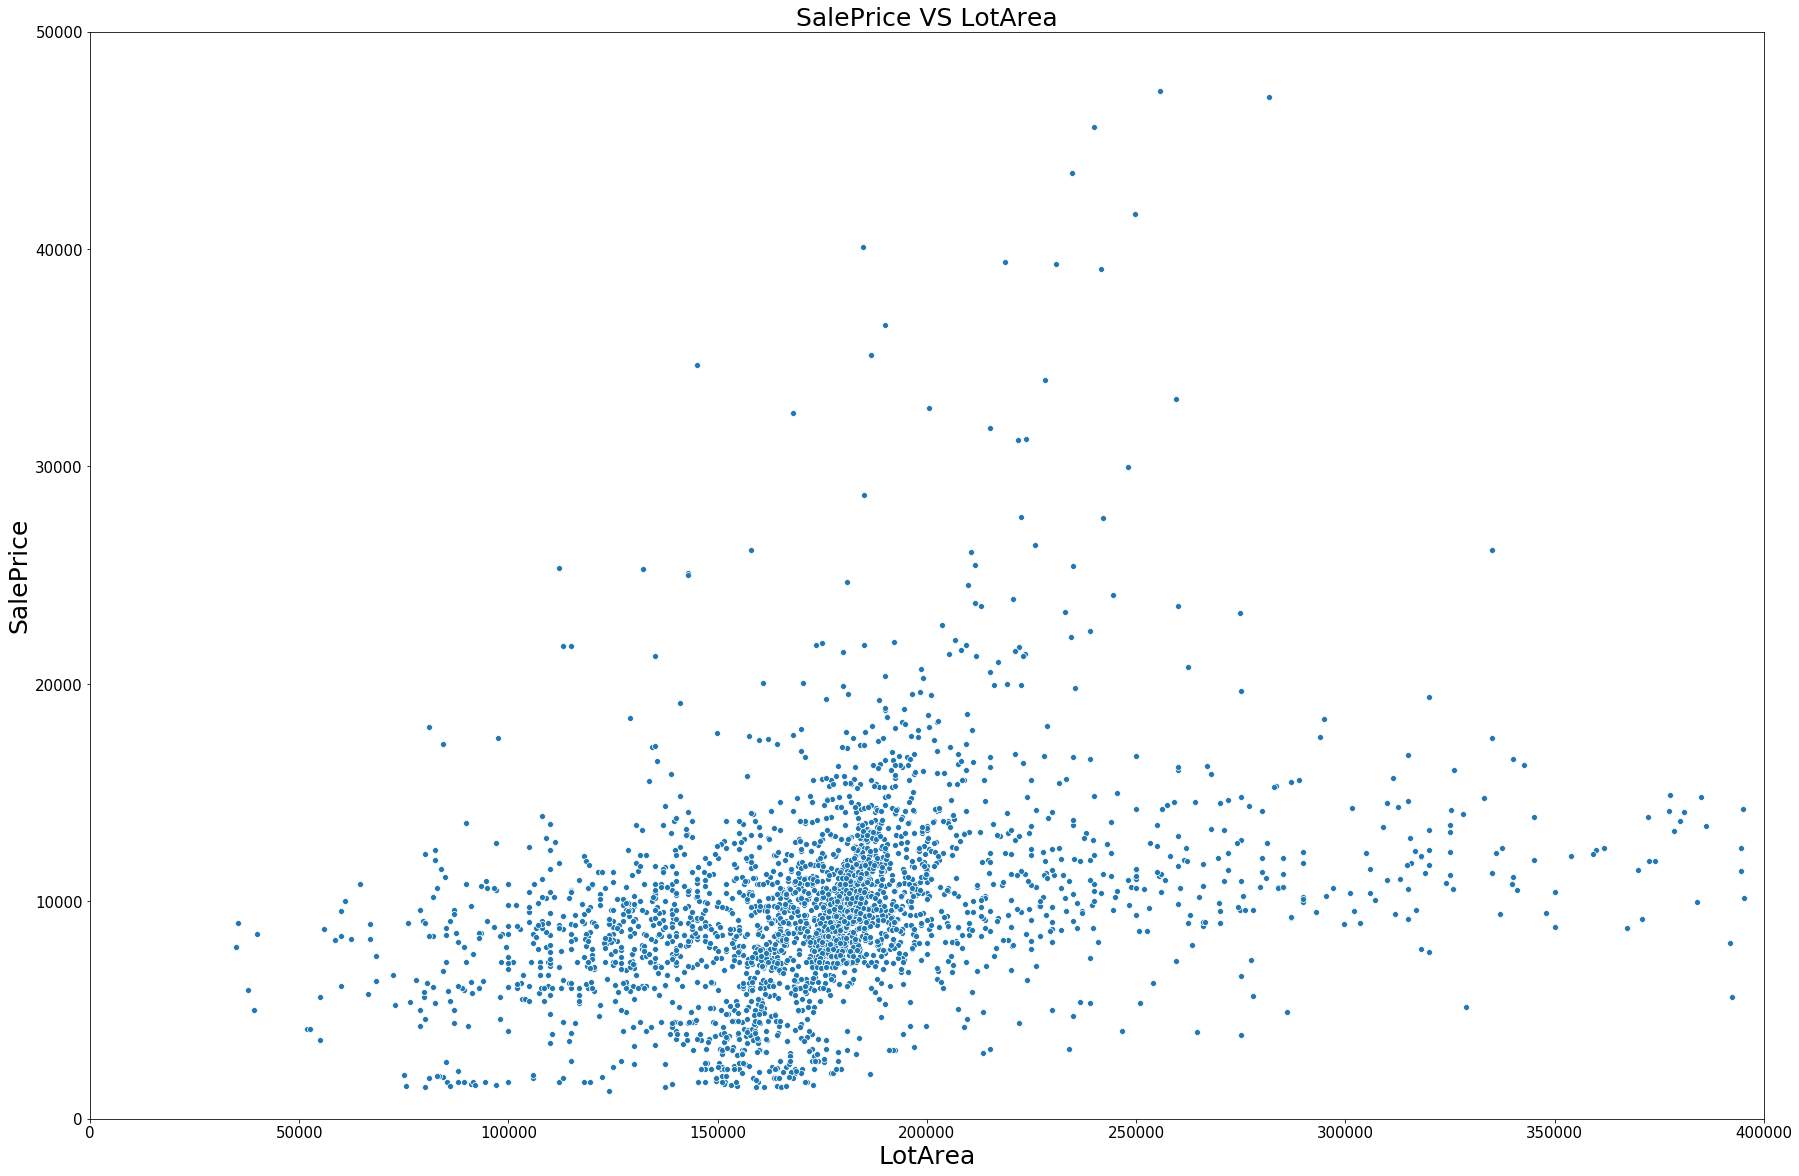

In [36]:
sns.scatterplot(x=data['SalePrice'],y= data['LotArea'])
plt.xlabel('LotArea', fontsize=25)
plt.ylabel('SalePrice', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('SalePrice VS LotArea', fontsize=25)
plt.rcParams["figure.figsize"] = (30,20)
plt.xlim(0,400000)
plt.ylim(0,50000)


###### Insights: This was unexpected, my assumption was that as lotarea increases the sale price of the house would also increase- but by looking at the graph it lotarea alone is not a contributing factor for saleprice


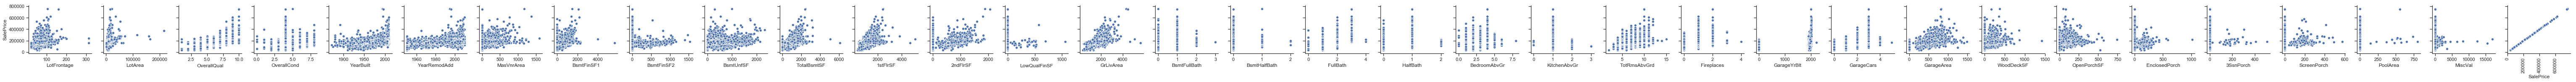

In [175]:
##Lets group all the numerical variables and see if any of it is related to saleprice 
from pandas.plotting import scatter_matrix
data_num = data.select_dtypes(include =['float64','int64'])
sns.pairplot(data_num, y_vars="SalePrice", x_vars=data_num.columns.values)
plt.xticks(rotation='90')
g.fig.set_size_inches(50,10)




(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text yticklabel objects>)

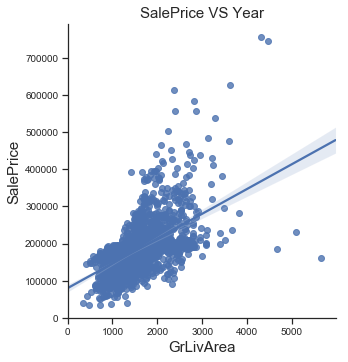

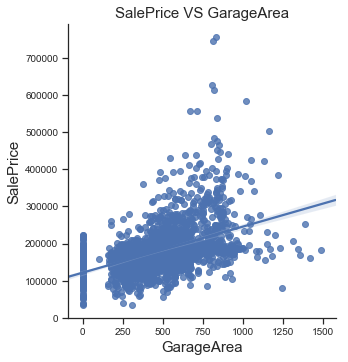

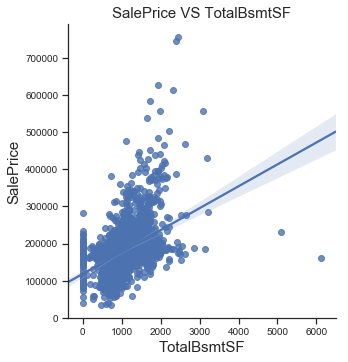

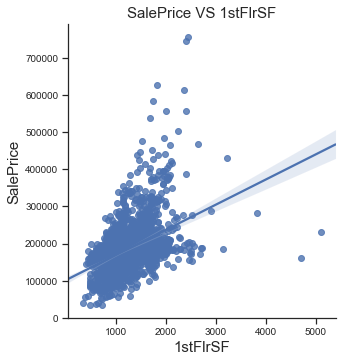

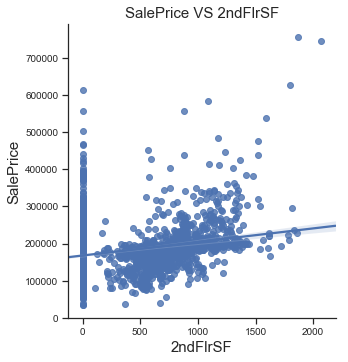

In [178]:
#Lets zoom in on a few variables 
sns.lmplot(x='GrLivArea',y='SalePrice',data=data)
plt.title('SalePrice VS Year', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.lmplot(x='GarageArea',y='SalePrice',data=data)
plt.title('SalePrice VS GarageArea', fontsize=15)
plt.xlabel('GarageArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=data)
plt.title('SalePrice VS TotalBsmtSF', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.lmplot(x='1stFlrSF',y='SalePrice',data=data)
plt.title('SalePrice VS 1stFlrSF', fontsize=15)
plt.xlabel('1stFlrSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.lmplot(x='2ndFlrSF',y='SalePrice',data=data)
plt.title('SalePrice VS 2ndFlrSF', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


###### Insights:
Here are some things that I noticed with respect to the relatioships 
1. The saleprice increase with the increase in living area square foot 
2. The saleprice increase with the increase in living area garage area
3. The saleprice increase with the increase in Total basement square foot
4. The saleprice increase with the increase in first floor square foot
5. The saleprice increase with the increase in second floor square foot

In [74]:
##Lets look at how salesprice performs with the categorical variable 
from dfply import *


In [77]:
#Summarising each of the categorical variables across mean of salesprice
OQ = (data >> group_by(X.OverallQual) >> summarize(avg=mean(X.SalePrice)))
OC = (data >> group_by(X.OverallCond) >> summarize(avg=mean(X.SalePrice)))
FB = (data >> group_by(X.FullBath) >> summarize(avg=mean(X.SalePrice)))
TR = (data >> group_by(X.TotRmsAbvGrd) >> summarize(avg=mean(X.SalePrice)))
FP = (data >> group_by(X.Fireplaces) >> summarize(avg=mean(X.SalePrice)))
GC = (data >> group_by(X.GarageCars) >> summarize(avg=mean(X.SalePrice)))

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]), <a list of 8 Text yticklabel objects>)

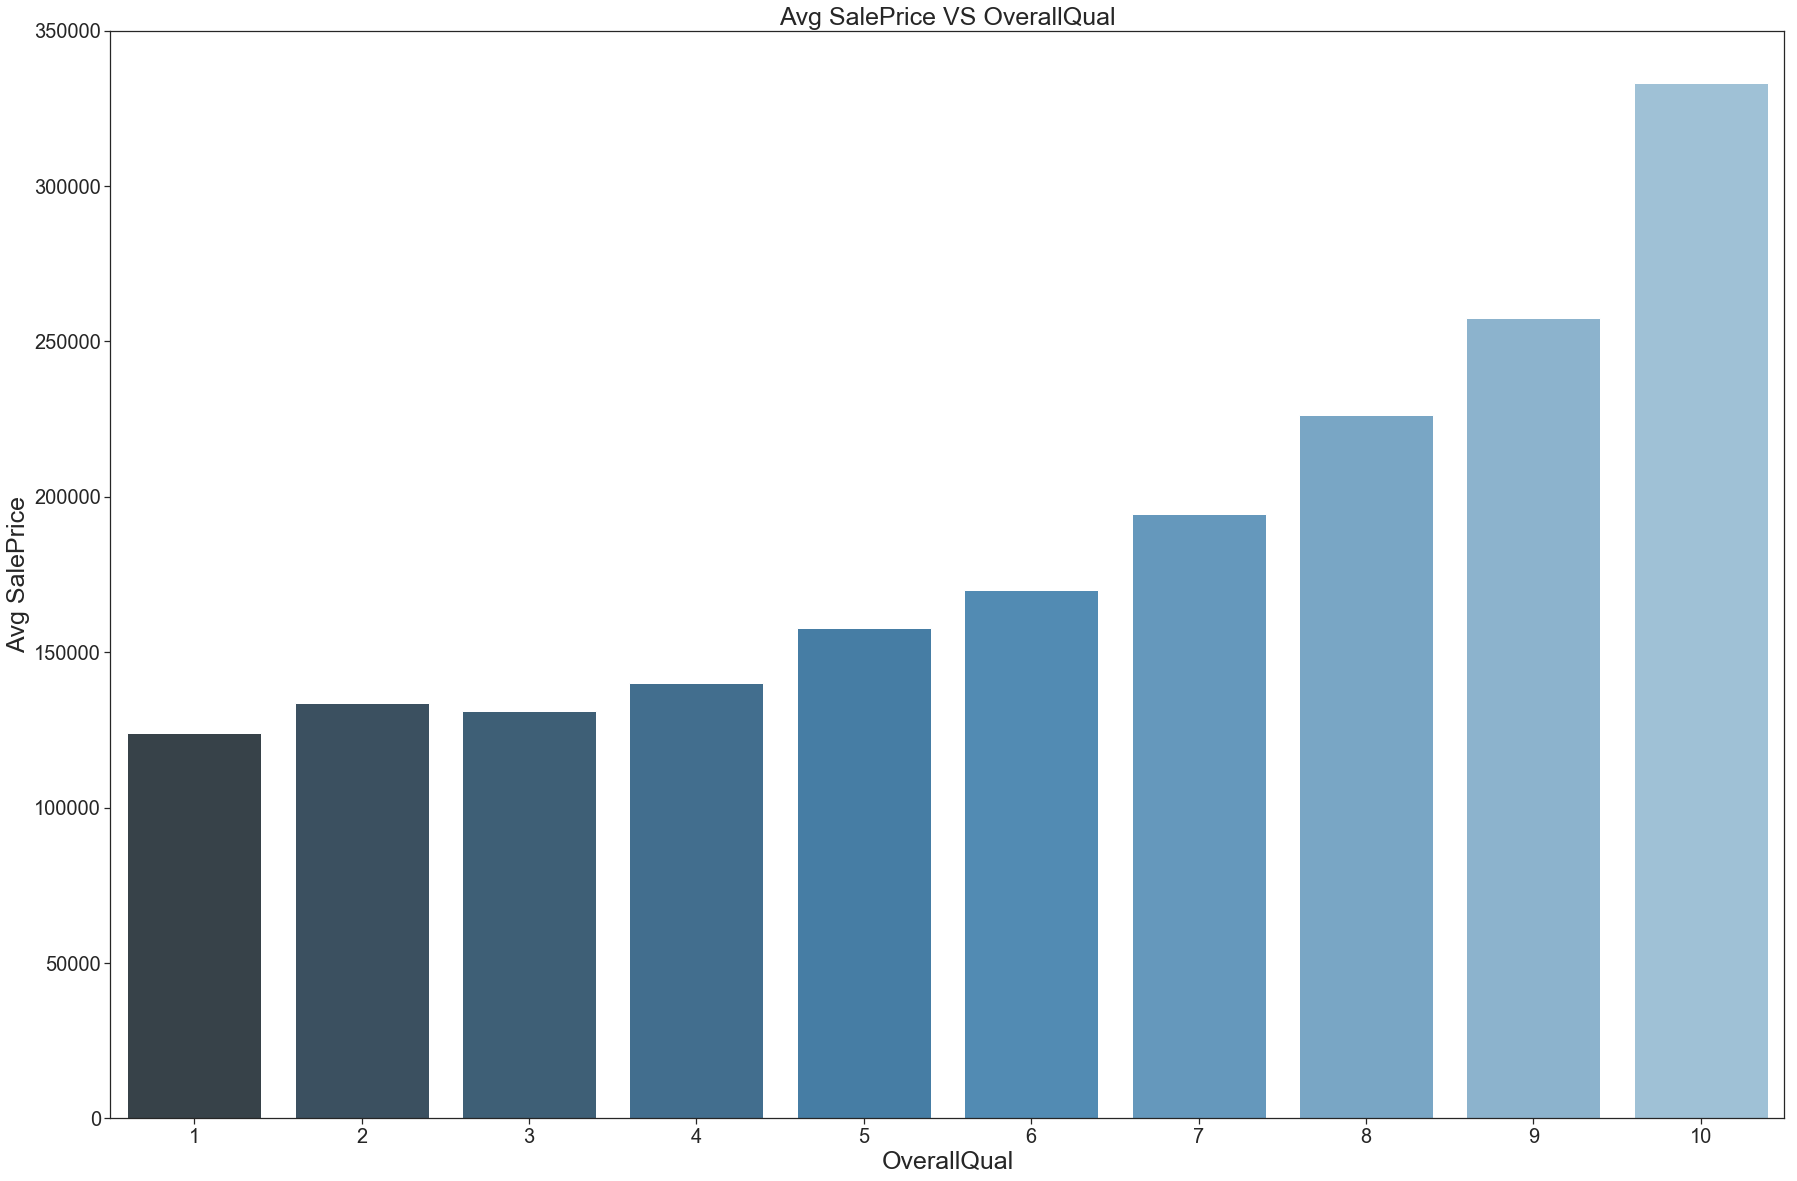

In [97]:
sns.set(style="ticks")
sns.barplot(x=OQ['OverallQual'],y= OQ['avg'],palette="Blues_d")
plt.xlabel('OverallQual', fontsize=25)
plt.ylabel('Avg SalePrice', fontsize=25)
plt.title('Avg SalePrice VS OverallQual', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]), <a list of 10 Text yticklabel objects>)

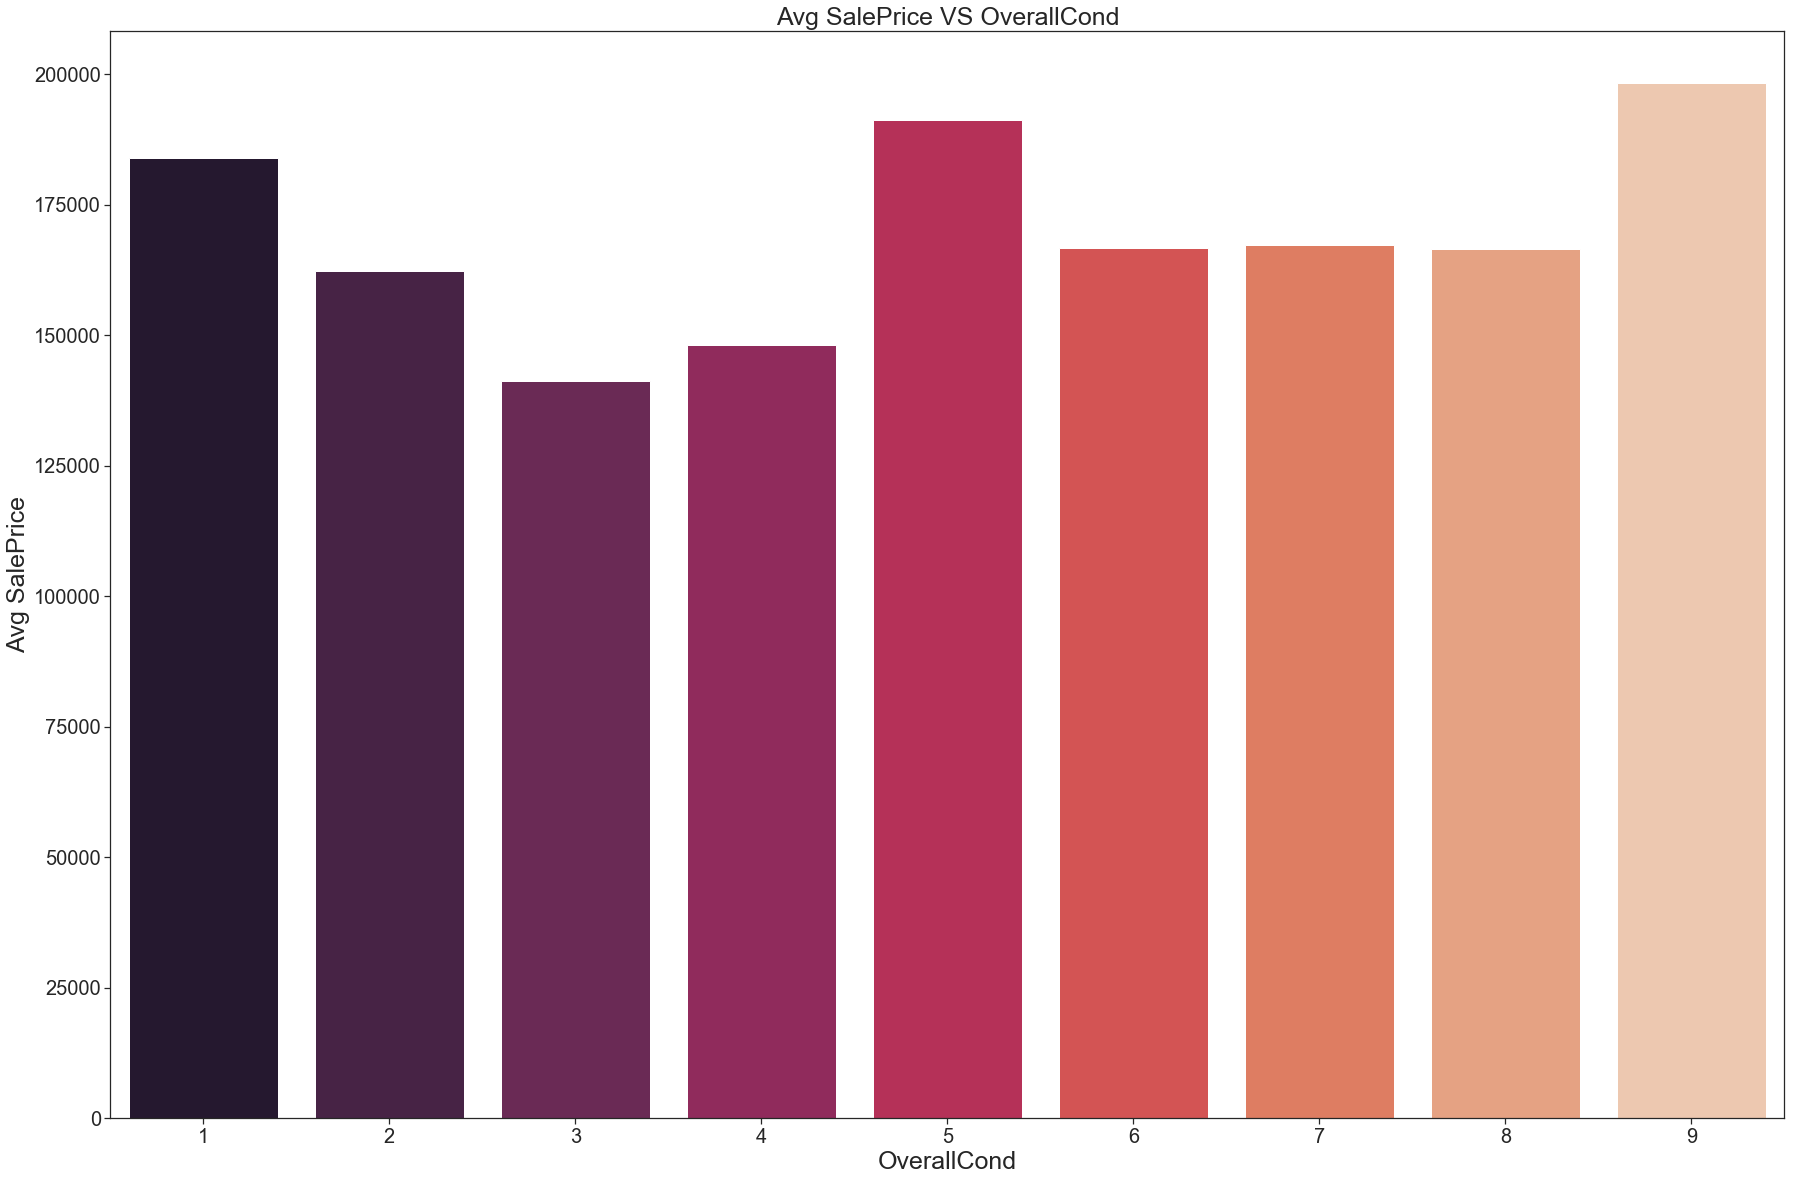

In [96]:
sns.set(style="ticks")
sns.barplot(x=OC['OverallCond'],y= OC['avg'],palette="rocket")
plt.xlabel('OverallCond', fontsize=25)
plt.ylabel('Avg SalePrice', fontsize=25)
plt.title('Avg SalePrice VS OverallCond', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text yticklabel objects>)

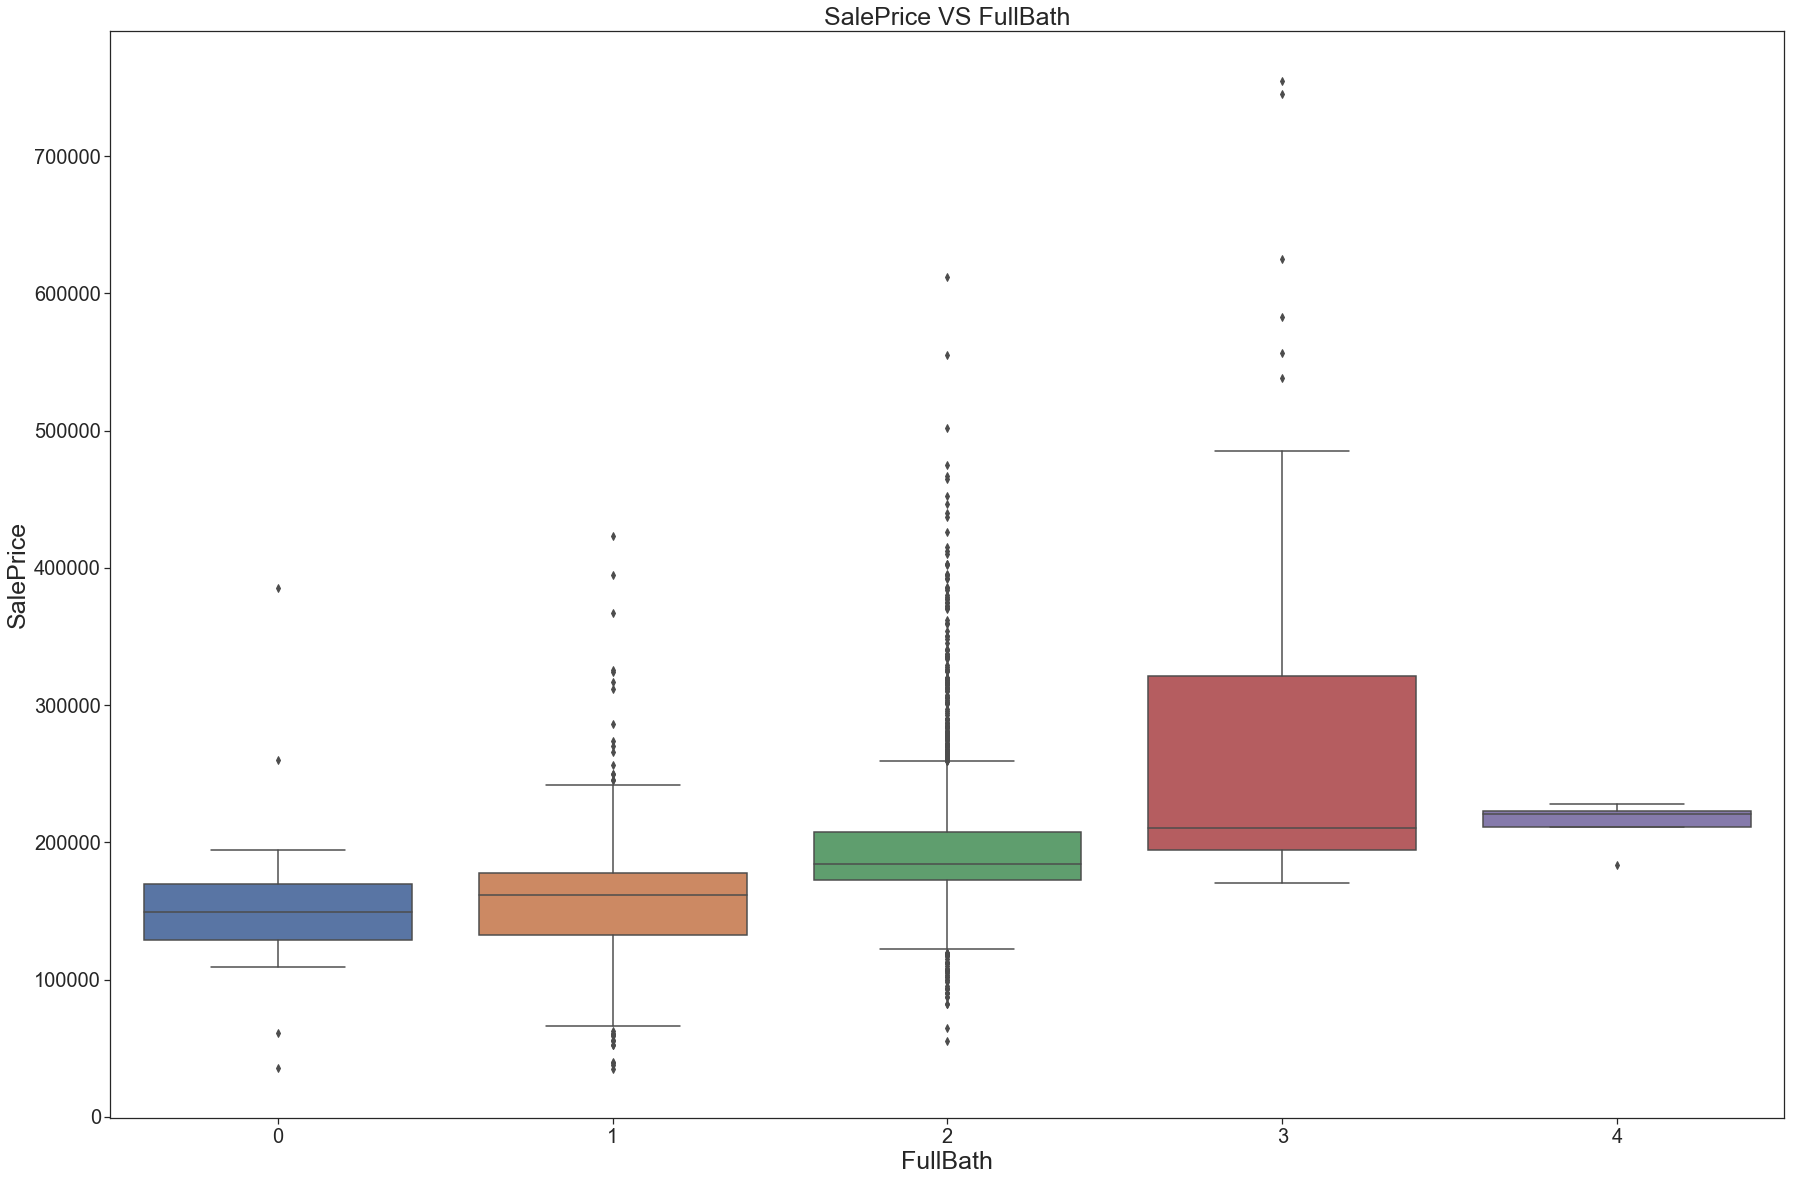

In [111]:
sns.set(style="ticks")
sns.boxplot(x=data['FullBath'],y= data['SalePrice'])
plt.xlabel('FullBath', fontsize=25)
plt.ylabel('SalePrice', fontsize=25)
plt.title('SalePrice VS FullBath', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text yticklabel objects>)

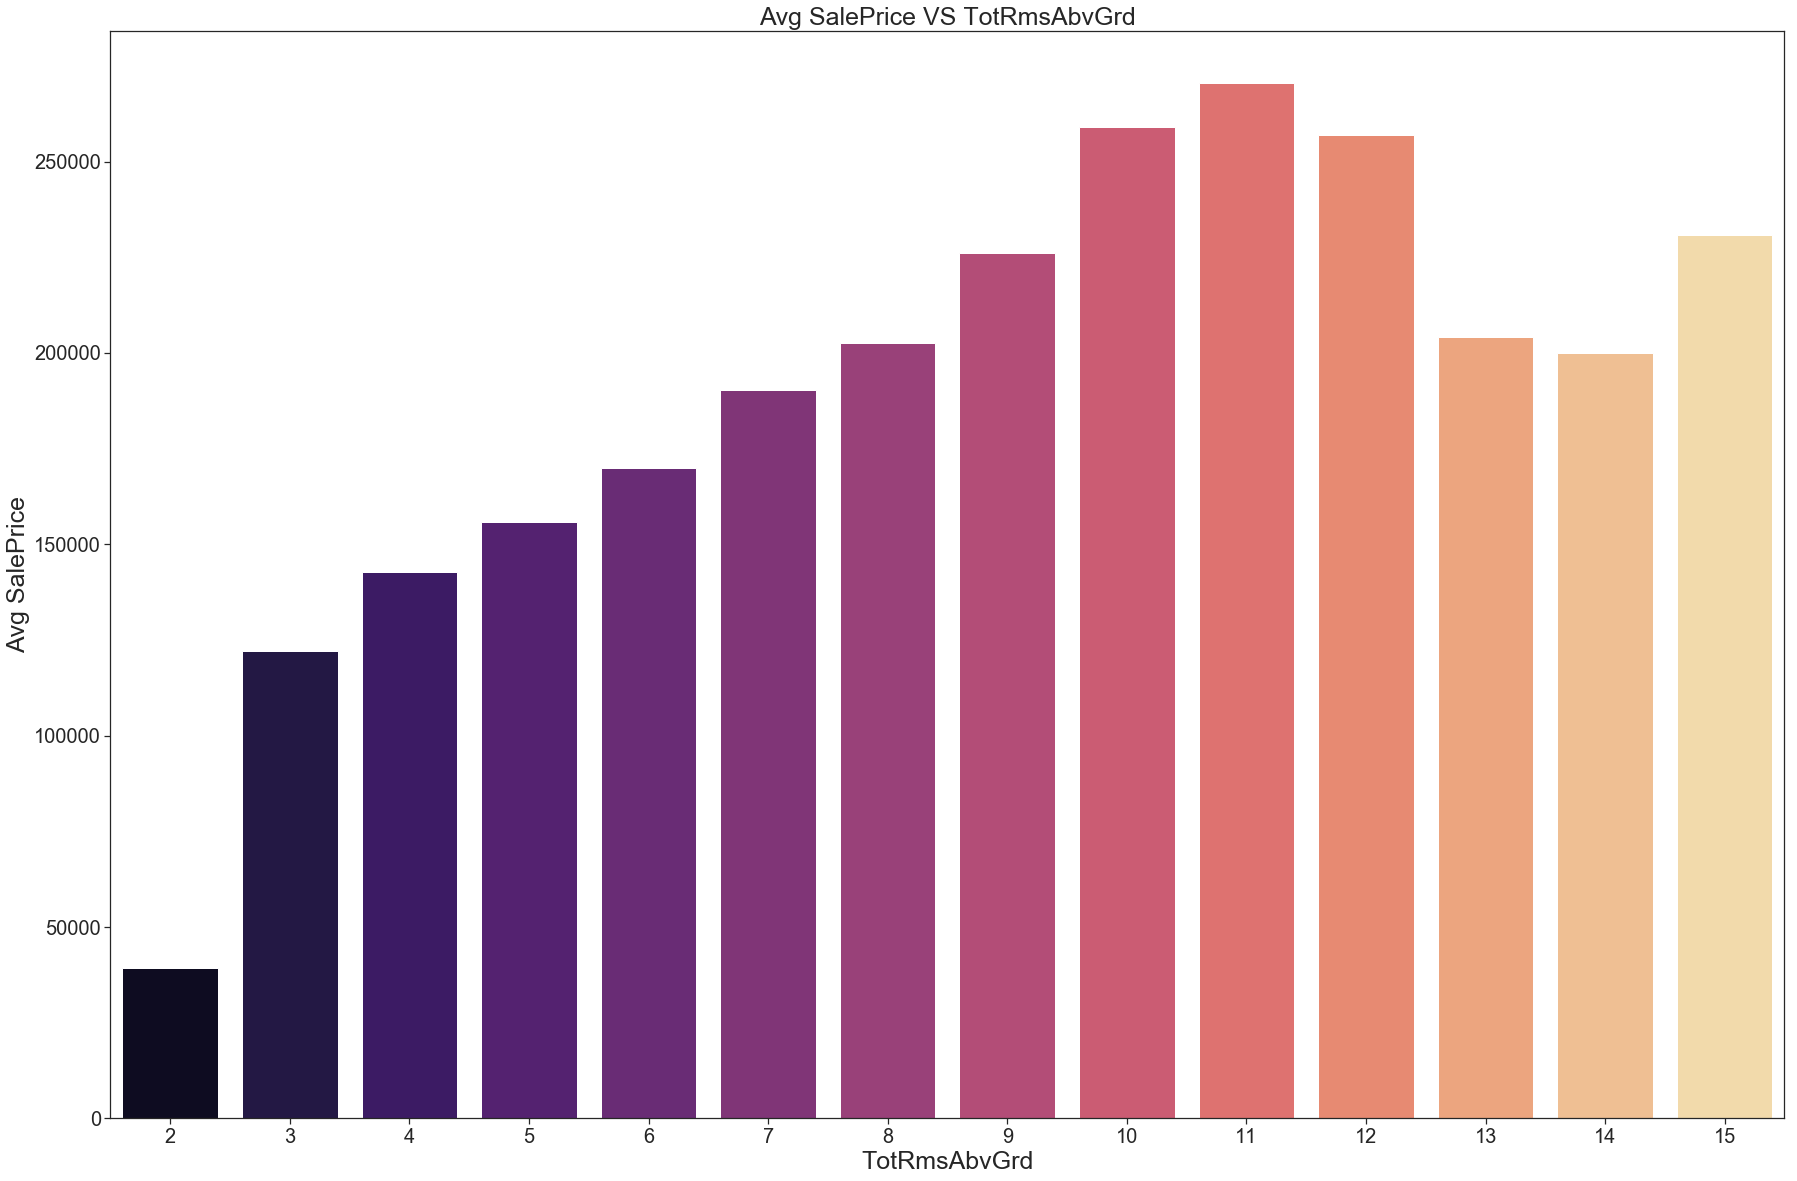

In [103]:
sns.barplot(x=TR['TotRmsAbvGrd'],y= TR['avg'],palette="magma")
plt.xlabel('TotRmsAbvGrd', fontsize=25)
plt.ylabel('Avg SalePrice', fontsize=25)
plt.title('Avg SalePrice VS TotRmsAbvGrd', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text yticklabel objects>)

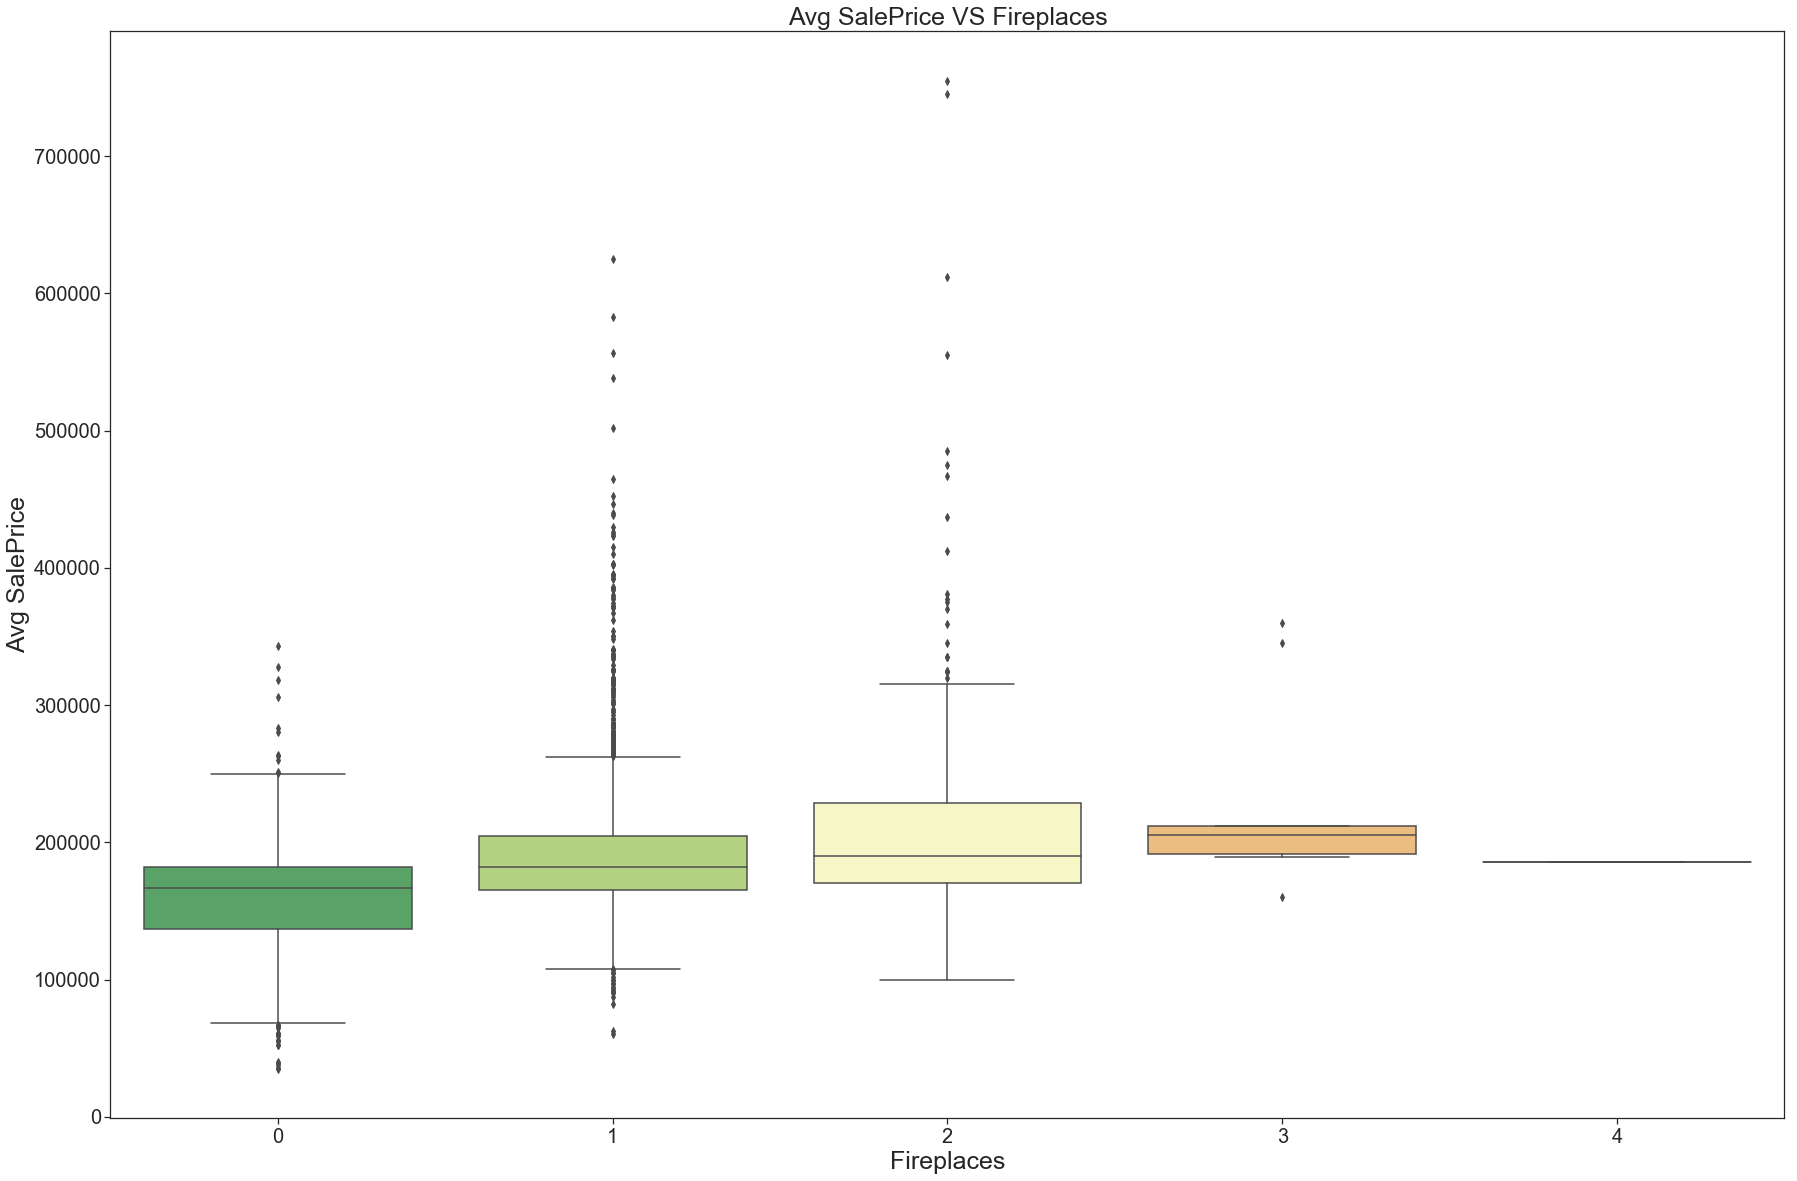

In [116]:
sns.boxplot(x=data['Fireplaces'],y= data['SalePrice'],palette="RdYlGn_r")
plt.xlabel('Fireplaces', fontsize=25)
plt.ylabel('Avg SalePrice', fontsize=25)
plt.title('Avg SalePrice VS Fireplaces', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text yticklabel objects>)

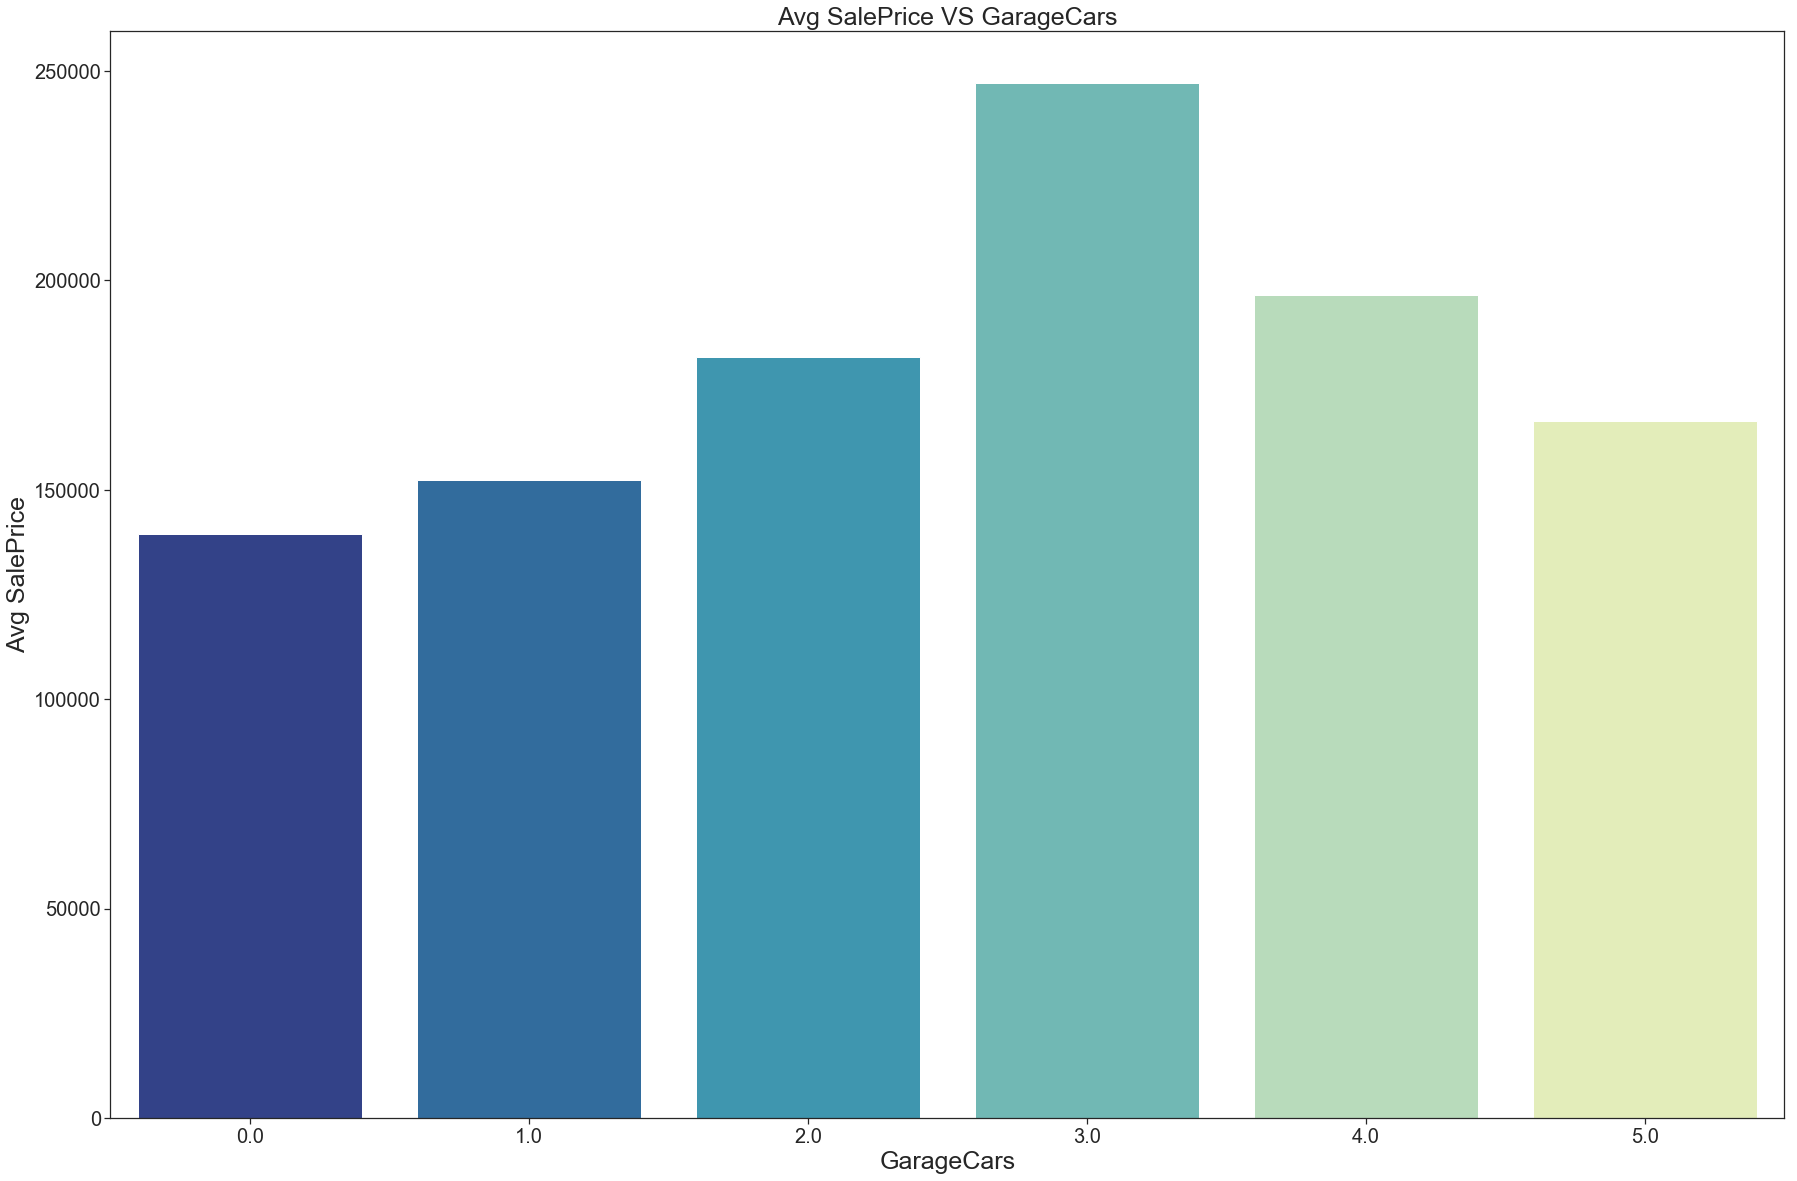

In [108]:
sns.barplot(x=GC['GarageCars'],y= GC['avg'],palette="YlGnBu_r")
plt.xlabel('GarageCars', fontsize=25)
plt.ylabel('Avg SalePrice', fontsize=25)
plt.title('Avg SalePrice VS GarageCars', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

###### Insights: From the above graphs there are a number of conclusions that can be made 
1. It is clear that saleprice increases if the overall quality of the house is high
2. The salesprice increases with the number of bedrooms up till 11 but after that it is seen to reduce
3. The salesprice increases with the number of  bathrooms up till 3 but after that it is seen to reduce, similar is the case with fireplaces and no of garage spaces available


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text yticklabel objects>)

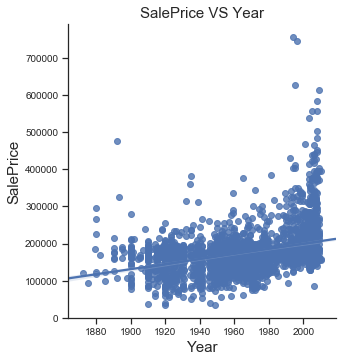

In [121]:
##Lets see how year built affects salesprice
sns.lmplot(x='YearBuilt',y='SalePrice',data=data)
plt.title('SalePrice VS Year', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


###### Insights: As expected the later the year of built is the higher they are valued at

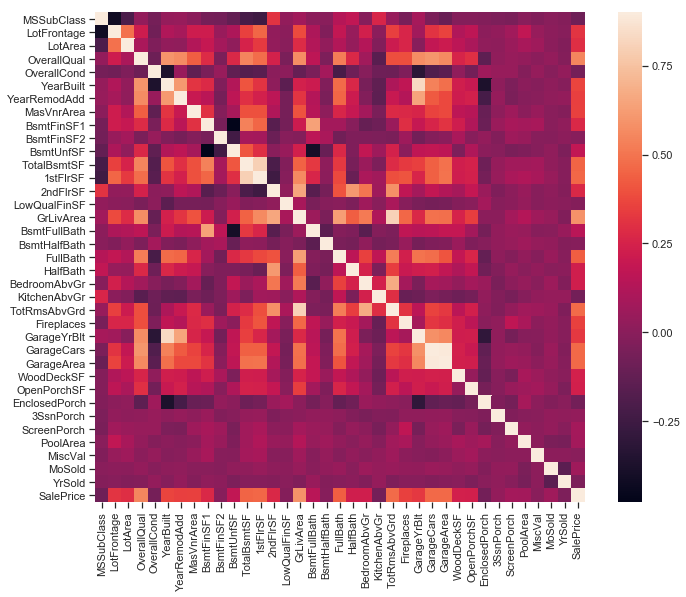

In [122]:
##Finally lets look at a correlation plot to understand all the variables
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

###### Insights : This helps us understand what variables we can omit to avoid multicollinearity 
1. It is seen that Year built of the house is correlated with year the garage was built which is quite obvious 
2. Total number of rooms is highly correlated with the living room area 
3. First floor area is higly correlated with the total basement area which is also obvious

<a id='ab4'></a>
## 3. Prepare data for Machine learning Algorithms 

<a id='ab5'></a>
### 3.1 Data cleaning- checking for missing values 

In [105]:
#To refresh ourselves with missing data we see that the top 5 features in missing value is due to the absense of these features in the house.Let's replace NA's with "Not available"
for i in ('PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'):
    data[i] = data[i].fillna('Not present')

In [106]:
##Lot frontage is a numerical feature and lets see how feature describes itself
data.LotFrontage.describe()


count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [107]:
##we see that mean and median are very close to each other, so lets choose mean to replace the nan values with 
print(np.nanmedian(data.LotFrontage))
data['LotFrontage'].fillna((data['LotFrontage'].mean()), inplace=True)

68.0


In [108]:
##Some of the houses do not have a garage, and I will replace the corresponding garage categorical features with Not present
for i in ('GarageFinish', 'GarageQual', 'Functional',
          'GarageCond', 'MSSubClass','GarageType','MasVnrType','BsmtQual', 
          'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[i] = data[i].fillna('Not present')


In [109]:
##Next there are numerical values for garage which I would replace it with 0 because there was no garage or no basement
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea',
          'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[i] = data[i].fillna(0)


In [110]:
##MSzoning and others are categorical variable that gets filled with the mode since they have categories
for i in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    data[i] = data[i].fillna(data[i].mode()[0])

In [111]:
##Looking at utilities there is just one value in the enitre dataset so there is really no variation captured by this so its safe to drop this feature
data = data.drop(['Utilities'], axis=1)

###### Insights:
1. To refresh ourselves with missing data we see that the top 5 features in missing value is due to the absense of these features in the house.Let's replace NA's with "Not available"
2. For lot frontage we see that mean and median are very close to each other, so lets choose mean to replace the nan values with
3. Some of the houses do not have a garage, and I will replace the corresponding garage categorical features with Not present
4. Next there are numerical values for garage which I would replace it with 0 because there was no garage or no basement
5. MSzoning and others are categorical variable that gets filled with the mode since they have categories
6. Looking at utilities there is just one value in the enitre dataset so there is really no variation captured by this so its safe to drop this feature

In [112]:
#Lets check if there are any more missing values
data.isnull().values.sum()


0

###### Insights: we have taken care of every feature in the dataset for missing values, we have zero missing values. Lets proceed further with treating categorical variables


<a id='ab6'></a>
### 3.2 Handling categorical variables 


In [113]:
#I am going to convert Month sold, year sold in to categories before I label encode them
data['YrSold'] = data['YrSold'].apply(str)
data['MoSold'] = data['MoSold'].apply(str)
##I am also going to convert MSSubClass in to category as this is a category of type of dwelling 
data['MSSubClass'] = data['MSSubClass'].apply(str)
## I can identify some of the variables which are ordinal in nature, lets label encode them 
from sklearn.preprocessing import LabelEncoder

ord1 = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope')  
le = LabelEncoder()   
for i in ord1:
    data[i] = le.fit_transform(data[i])  



In [114]:
###Converting to dummies
data = pd.get_dummies(data)
print(data.shape)
data.dtypes.value_counts()


(2919, 222)


uint8      163
int32       25
int64       23
float64     11
dtype: int64

###### Insights :
1. After converting to dummy variables, we see that we have a total of 221 variables excluding the target variable
2. We see that the numerical values still remain the same whereas the other categorical values have been converted in to dummies


<a id='ab7'></a>
### 3.3 Scaling and splitting the dataset  

In [115]:
from sklearn.model_selection import train_test_split

##Creating target and indpendant variables
y = data['SalePrice']
X = data.drop(['SalePrice'],axis=1)

#Splitting in to train and test 
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

#Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


###### Insights: Since the numerical variables are on a varied scale(different range) We are going to scale the data using MinMaxScaler which is also also helpful in feature importance. Minmaxscaler is faster than Standardscaler and this is the reason that we have chosen MinMaxScaler 


<a id='ab8'></a>
### 4. Modeling- Selecting, triaining and optimizing 

<a id='ab9'></a>
### 4.1 Lasso regression and feature importance

Text(0.5, 1.0, 'Lasso')

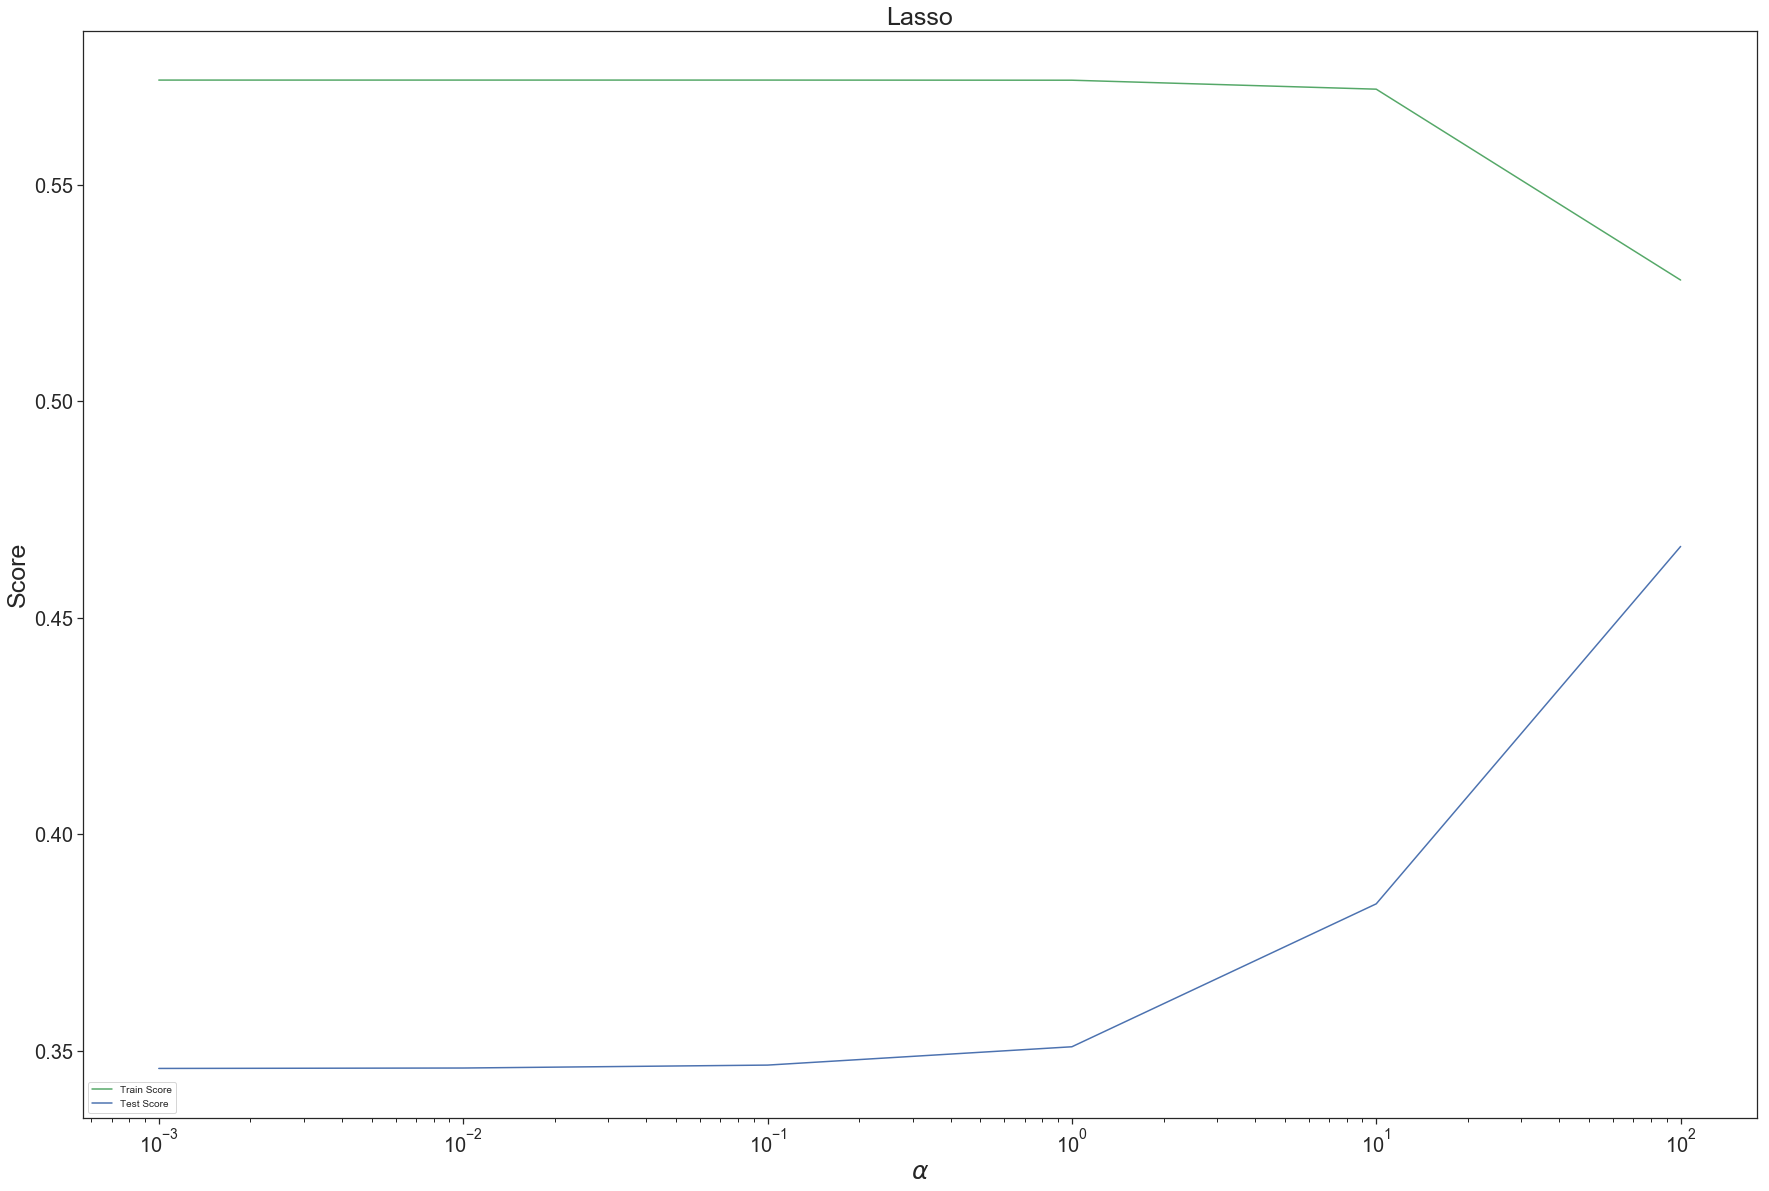

In [146]:
#Now is the fun part- lets start off by doing some feature importance using lasso
from sklearn.linear_model import Lasso
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
coeff=[]

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )    
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.legend(loc = 3,fontsize=10)
plt.xlabel(r'$\alpha$',fontsize=25)
plt.ylabel('Score',fontsize=25)
plt.title('Lasso',fontsize=25)




###### Insights:  We look at the graph above and see that for higher values of alpha(100) test and train score from the graph appear to converge, lets use crossvalidation to see if we can get any better 
 

In [148]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV

alphas = (0.001, 0.01, 0.1, 1, 10, 100)
tuned_parameters = [{'alpha': alphas}]
grid_search = GridSearchCV(lasso,tuned_parameters, cv=5, return_train_score=True)
##I used cv=8 because rule of thumb to use for cv is between 5 to 11
g1=grid_search.fit(X_train, y_train)

##Lets look at the best parameters and the best cv score for train
print("Best parameters for train: {}".format(g1.best_params_))
print("Best cross-validation score: {:.2f}".format(g1.best_score_))

##Use these parameters and fit to our test set
g2 = grid_search.fit(X_test, y_test)

#Lets look at the best parameters and the best cv score for test
print("Best parameters for test: {}".format(g2.best_params_))
print("Best cross-validation score: {:.2f}".format(g2.best_score_))


Best parameters for train: {'alpha': 100}
Best cross-validation score: 0.41
Best parameters for test: {'alpha': 100}
Best cross-validation score: 0.37


###### Insights: The best parameters for alpha is 100 and the best CV score is found to be 0.41 for train and 0.37 for test


Lasso picked 78 variables and eliminated the other 143 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

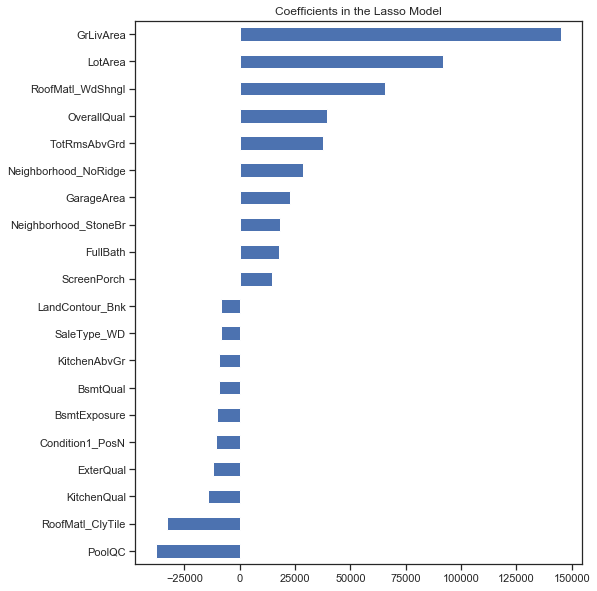

In [150]:
#Feature importance with lasso
coef = pd.Series(lasso.coef_, index = X_train_org.columns)
##We check to see how many variables lasso chose to be making an impact on salePrice
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables") 

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

#Lets see which all variables are important 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


###### Insights : 
1. Lasso picked 78 variables and eliminated the other 143 variables
2. We see here the top 10 and the bottom 10 important features, As we saw earlier while exploring data Living area sq feet, overall qual of the house, garage area, no of bathrooms have a huge impact on Saleprice


In [151]:
##Lets get some predictions out of the lasso model
from sklearn import metrics 
pred_lasso = grid_search.predict(X_test)
pred_lasso= pred_lasso.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
lasso_MAE = metrics.mean_absolute_error(y_test, pred_lasso)


MAE: 24603.066491993384


###### Insights : I would consider Mean absolute error as a metric in my sales prediction here, MAE of 24603 signifies that I am predicting my salesprice to be +- 24k
 

<a id='ab10'></a>
### 4.2 Linear regression using normal equation 


In [117]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

##This is the perfect case of overfitting, lets use cross validation to see if it gets any better
 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

scores = cross_val_score(lreg, X_train, y_train)
print("Cross-validation scores: {}".format(scores))


0.5742182635670727
-1.6017416128850048e+20
Cross-validation scores: [-5.78367319e+19 -1.91567461e+20 -1.13172500e+19]


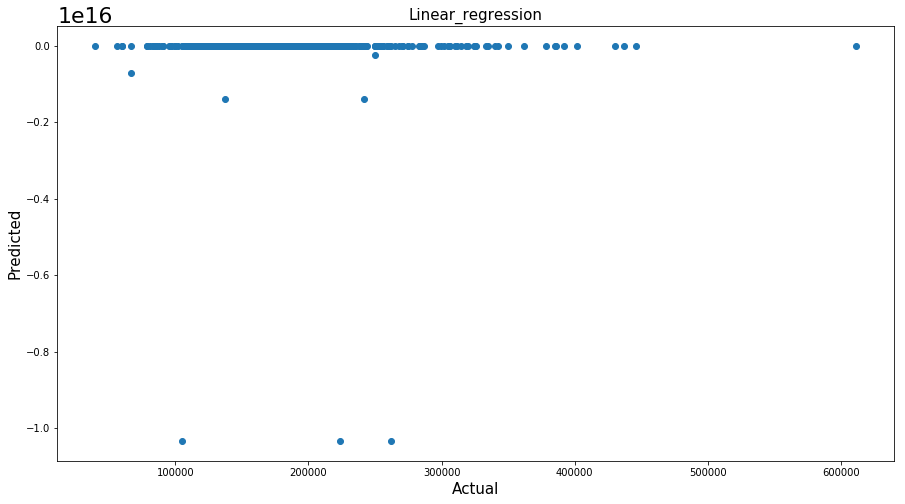

In [121]:
#Further lets see what predictions we get from this model and evalute their residuals
pred = lreg.predict(X_test)
pred= pred.reshape(-1,1)
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Linear_regression',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



###### Insights: 
1. We see that the scores from linear regression are invalid, one of the reasons for it might be becasue we have too many variables in the model which are highly collinear to each other
2. There is not much that we can infer out the graph, except that the model needs more rework and it is not performing well in predicting saleprice 


In [154]:
###Lets use some evaluation metrics to confirm  
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
lreg_MAE=  metrics.mean_absolute_error(y_test, pred)


MAE: 47676542199857.77


###### All of the above evaluation metrics looks ridiculously high, maybe linear regression is not the model for this data 


<a id='ab11'></a>
### 4.3 KNN regressor

Text(0, 0.5, 'MSE')

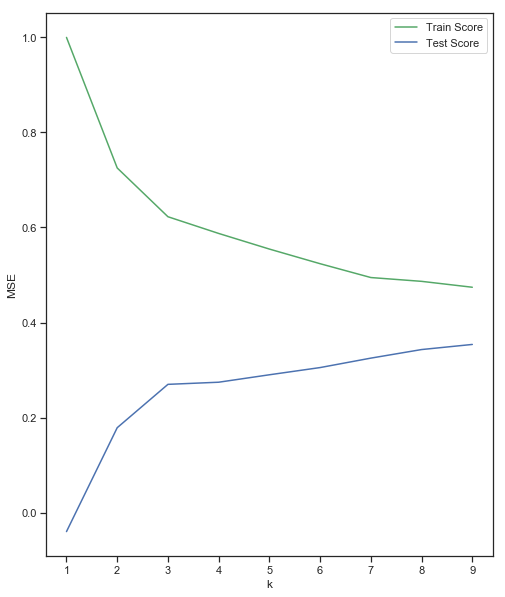

In [155]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')


###### Insights: Here looking at the graph here train and test score start converging after K= 8 but the best value for K would be 10 looking at the graph. Lets use cross validation and grid search to find the best parameters


Best parameters for train: {'n_neighbors': 10}
Best cross-validation score: 0.32


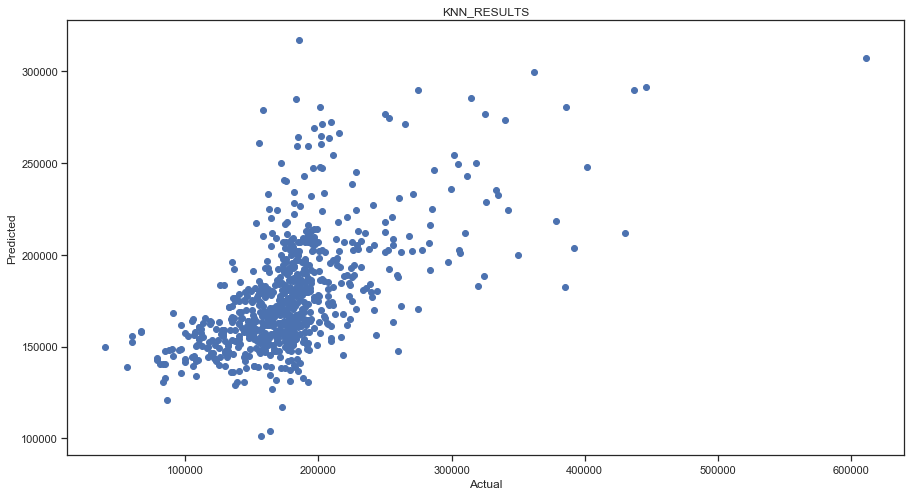

In [156]:
grid_params = {
        'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
grid_search_KNN = GridSearchCV(knn_reg,grid_params, cv=5, return_train_score=True)

grid_search_KNN.fit(X_train, y_train)

##Lets look at the best parameters and the best cv score for train
print("Best parameters for train: {}".format(grid_search_KNN.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_KNN.best_score_))

##We have used grid search with cross validation with 5 folds above and fit it to our KNN model and the output of the grid search says that Best cross validation score is 0.32 with nearest neighbors being 10
pred_KNN = grid_search_KNN.predict(X_test)
pred_KNN= pred_KNN.reshape(-1,1)
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_KNN)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN_RESULTS')
plt.show()



###### Insights:The above plot depicts Actual on x-axis and Predicted on Y-axis, this lets us visualise how our model has performed, lets see the error rate


In [157]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_KNN))
KNN_MAE =  metrics.mean_absolute_error(y_test, pred_KNN)


MAE: 29683.939315068492


###### Insights: I would consider Mean absolute error as a metric in my sales prediction here, MAE of 29683 signifies that I am predicting my salesprice to be higher or lower by 29k


<a id='ab12'></a>
### 4.4 Ridge regression 


Text(0.5, 0, '$\\alpha$')

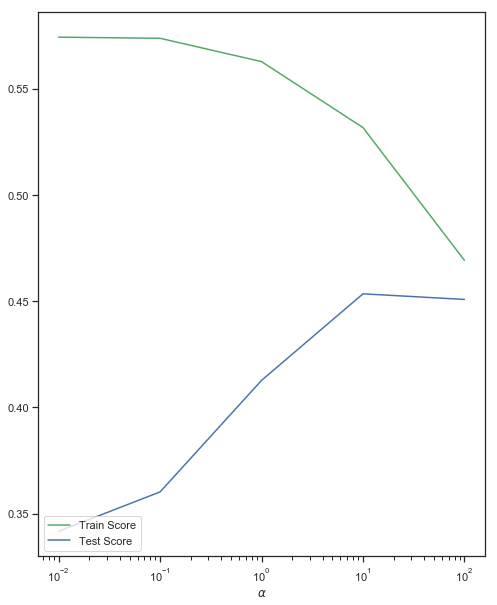

In [158]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')


###### Insights: We notice ridge to perform the same way as lasso with the alpha, with higher values of alpha the test and the train score converge and get closer which will avoid overfitting. Lets use cross validation and grid search to see numerical results

Best parameters for train: {'alpha': 10}
Best cross-validation score: 0.41
MAE: 28285.188138182206


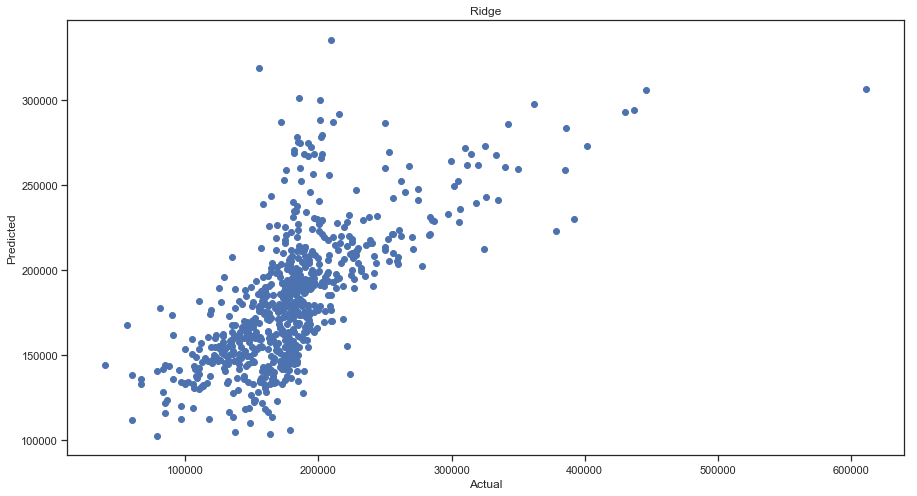

In [159]:
ridge_alphas = (0.001, 0.01, 0.1, 1, 10, 100)
grid_search_r = GridSearchCV(ridge,param_grid=dict(alpha=ridge_alphas), cv=5, return_train_score=True)
##I used cv=8 because rule of thumb to use for cv is between 5 to 11
grid_search_r.fit(X_train, y_train)
print("Best parameters for train: {}".format(grid_search_r.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_r.best_score_))

##The model chose alpha of 10 and cross validation score of 0.41, lets see how it performs on unseen data
pred_ridge = grid_search_r.predict(X_test)
pred_ridge= pred_ridge.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))

ridge_MAE= metrics.mean_absolute_error(y_test, pred_ridge)
##Lets see how it depicts on a graph
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge')
plt.show()


###### Insights : We get Best value of alpha as 10 and Best score for train of 0.41.

<a id='ab13'></a>
### 4.5 Polynomial regression

In [122]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    #Polynomial Features is an unsupervised learning model 
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    #Line 7 can be replaces bu the followin gtwo lines 
    #pol.fit(X_train)
    #pol.transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

print(train_score_list)
print(test_score_list)




[0.574218895039202, 0.99990401873862]
[-3.1046246475845575e+19, -6092536699421.348]


###### Insights :As seen before linear regression performs really bad on this dataset, even with higher degree of equation - regression does poorly 


<a id='ab14'></a>
### 4.6 Support vector machine(linear)

Text(0.5, 0, '$\\alpha$')

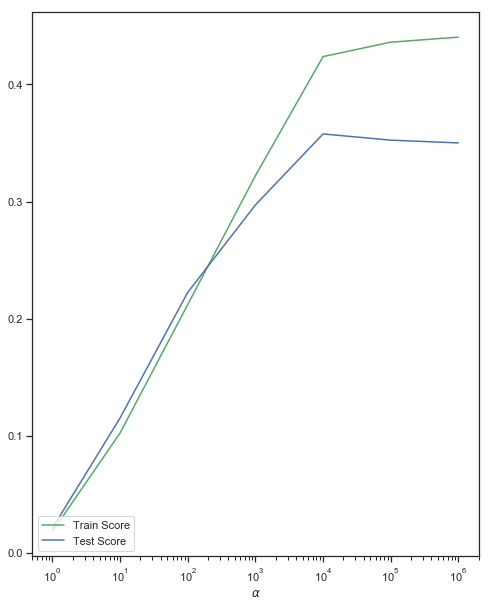

In [161]:
from sklearn.svm import SVR
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

C= [1,10,100,1000,10000,100000,1000000]

train_score_list = []
test_score_list = []

for i in C: 
    clf = SVR(kernel='linear', C=i)
    clf.fit(X_train,y_train)
    train_score_list.append(clf.score(X_train,y_train))
    test_score_list.append(clf.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(C, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

###### Insights: We see above that at C=10000 we see both train and test converge, lets use grid search and cross validation to see which is the best 

In [162]:
param_grid_linear = {'C': [1,10,100,1000,10000,100000,1000000]}
grid_search_linear = GridSearchCV(clf, param_grid_linear, cv=5, return_train_score=True)
grid_search_linear.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_linear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linear.best_score_))

pred_SVM_Linear = grid_search_linear.predict(X_test)
pred_SVM_Linear= pred_SVM_Linear.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, pred_SVM_Linear))

SVM_Linear_MAE= metrics.mean_absolute_error(y_test, pred_ridge)


Best parameters: {'C': 10000}
Best cross-validation score: 0.32
MAE: 28076.270405390256


###### Insights: 
1. Best parameters: (C: 10000)
2. Best cross-validation score: 0.32
3. MAE: 28K


<a id='ab15'></a>
### 4.7 Support vector Machine(Using Linearsvc)

Text(0.5, 0, '$\\alpha$')

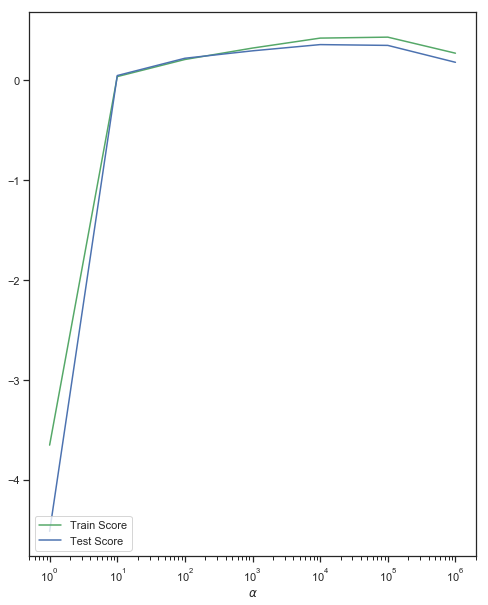

In [163]:
from sklearn.svm import LinearSVR

train_score_list = []
test_score_list = []
C= [1,10,100,1000,10000,100000,1000000]

for i in C: 
    clf = LinearSVR(C=i)
    clf.fit(X_train,y_train)
    train_score_list.append(clf.score(X_train,y_train))
    test_score_list.append(clf.score(X_test, y_test))
    
import matplotlib.pyplot as plt
plt.plot(C, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

###### Insights: Looking at the graph it looks like LinearSVC is performing very poorly on predicting salesprice, hence we will not check for its error

<a id='ab16'></a>
### 4.8 Support vector machine(poly)

Best parameters: {'C': 10000, 'degree': 1}
Best cross-validation score: 0.17
MAE: 29011.526749053308


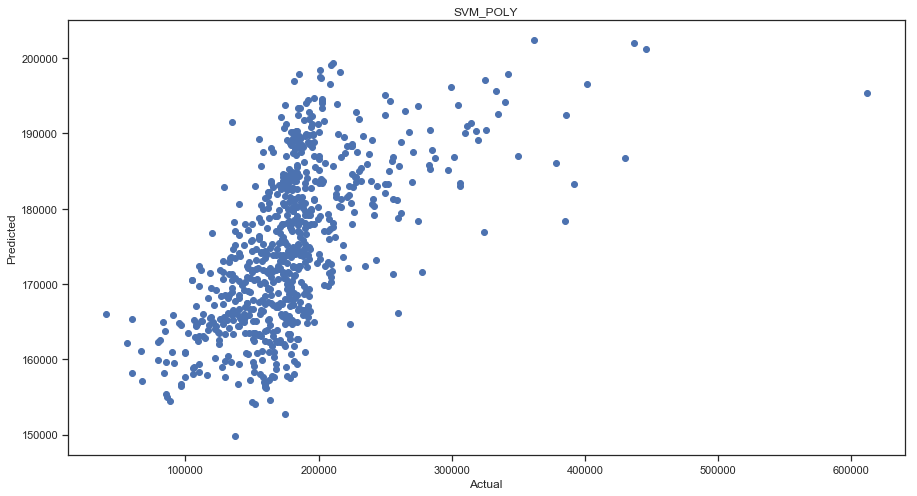

In [165]:
param_grid_poly = {'C': [1,10,100,1000,10000],
              'degree': [1, 2, 3]}

grid_search_poly = GridSearchCV(SVR(kernel='poly'), param_grid_poly, cv=5, return_train_score=True)
grid_search_poly.fit(X_train,y_train)
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

##Lets see som predictions 
pred_SVR_poly = grid_search_poly.predict(X_test)
pred_SVR_poly= pred_SVR_poly.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, pred_SVR_poly))

##Pred VS actual 
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_SVR_poly)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM_POLY')
plt.show()

###### Insights: With the best parameters being degree=1 and C= 10000, we still get MAE 29K which means we are +- 29K off salesprice

<a id='ab17'></a>
### 4.9 Support vector machine(rbf)

Best parameters: {'C': 1000000, 'gamma': 0.01}
Best cross-validation score: 0.32


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.743720,0.006427,0.171257,0.000981,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.034755,0.024344,0.019333,...,0.028415,0.008286,22,0.026170,0.029552,0.030677,0.029781,0.025714,0.028379,0.002030
1,0.736885,0.001332,0.172041,0.000842,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.134458,0.103624,0.096065,...,0.116428,0.021564,17,0.111386,0.117019,0.120652,0.119800,0.109589,0.115689,0.004451
2,0.737269,0.001397,0.171458,0.000318,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.162841,0.124049,0.117174,...,0.140055,0.029352,15,0.141684,0.148544,0.153305,0.155312,0.142351,0.148240,0.005539
3,0.737866,0.001067,0.171954,0.000550,1000,1,"{'C': 1000, 'gamma': 1}",0.002107,-0.004561,-0.005938,...,-0.001297,0.004722,24,0.018709,0.019593,0.020184,0.021858,0.015784,0.019226,0.002005
4,0.750997,0.001151,0.170552,0.000664,1000,10,"{'C': 1000, 'gamma': 10}",-0.000878,-0.006796,-0.008652,...,-0.004312,0.003369,31,0.015646,0.016397,0.017992,0.018469,0.014064,0.016514,0.001598


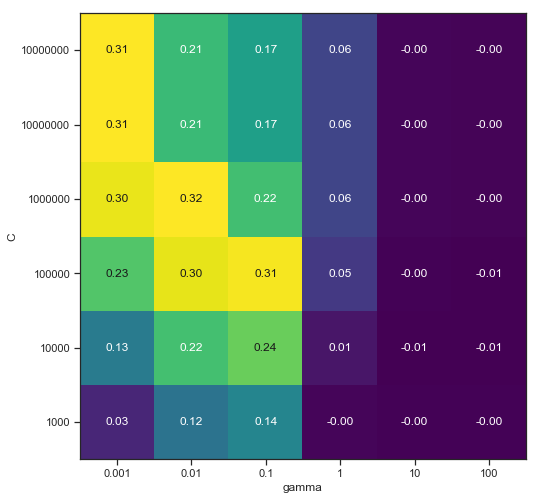

In [168]:
param_grid = {'C': [1000,10000,100000,1000000,10000000,10000000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)
grid_search_rbf.fit(X_train,y_train)
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))


import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search_rbf.cv_results_)
# show the first 5 rows
display(results.head())

import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")




In [170]:
##Computing MAE
pred_SVR_rbf = grid_search_rbf.predict(X_test)
pred_SVR_rbf= pred_SVR_rbf.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, pred_SVR_poly))
SVM_rbf_MAE =  metrics.mean_absolute_error(y_test, pred_SVR_poly)

MAE: 29011.526749053308


###### Insights: 
1. From the graph it is evident that train scores are highest at C=1000000 and gamma=0.01, The above figure is a comparison of when the train scores are maximum. We are able to view how the scores move across C. Score increases as C increases from 100 and attains stability at C= 1000000 and starts decreasing. 
2. The MAE in this is computed to be 29K which means that I am +- 29K wrt predicting salesprice 

<a id='ab17'></a>
## 5.Results   

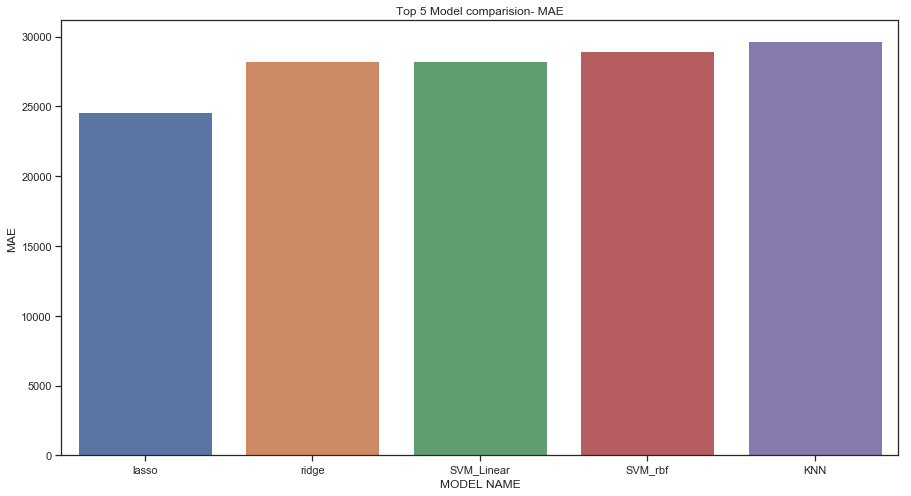

In [171]:
#Lets compute the MAE for all the models we have run and choose the one that has the least MAE

all_MAE = [lasso_MAE,lreg_MAE,ridge_MAE,SVM_Linear_MAE,SVM_rbf_MAE,KNN_MAE]

purchase_1 = pd.Series({'Model': 'lasso',
                        'MAE': lasso_MAE
                        })
purchase_2 = pd.Series({'Model': 'lreg',
                        'MAE': lreg_MAE
                        })

purchase_3 = pd.Series({'Model': 'ridge',
                        'MAE': ridge_MAE
                        })
purchase_4 = pd.Series({'Model': 'SVM_Linear',
                        'MAE': SVM_Linear_MAE
                        })
purchase_5 = pd.Series({'Model': 'SVM_rbf',
                        'MAE': SVM_rbf_MAE
                        })
purchase_6 = pd.Series({'Model': 'KNN',
                        'MAE': KNN_MAE
                        })


df = pd.DataFrame([purchase_1, purchase_3,purchase_4,purchase_5,purchase_6], index=['Store 1', 'Store 3','S4','S5','S6'])
df.head()


plt.figure(figsize=(15,8))
sns.barplot(x=df.Model,y=df.MAE)
plt.xlabel('MODEL NAME')
plt.ylabel('MAE')
plt.title('Top 5 Model comparision- MAE')
plt.show()

<a id='ab18'></a>
###### Results: The above is the plot that compares Mean absolute error across several models that we ran in this notebook.I have chosen to represent the top 5 performing models.Looking at the graph it is evident that Lasso has the least error and I would be choosing Lasso as my best performing model and my predictions are done on lasso


<a id='ab19'></a>
###### 5.1 Further Improvements: Since the dataset after converting in to dummy variables have 220 columns, we need to run an algorithm that brings down the features. We can either run Principal component analysis or use variables selected by Lasso and drop the zero co-eff columns and re run the entire analysis

# Part 2 - Classification Problem 


## Table of contents:
1. [The Big Picture](#ab20)
2. [Get the data](#ab21)
    1. [Exploratory data analysis](#ab22)
3. [Prepare data for Machine learning Algorithms](#ab23)
  1. [Data cleaning- checking for missing values](#ab24)
  2. [Handling categorical variables](#ab25)
  3. [Scaling and splitting the dataset](#ab26)  
4. [Modeling- Selecting, triaining and optimizing](#ab27)
  1. [K-Nearest Neighbor Classifier](#ab28)
  2. [Logistic Regression](#ab29)
  3. [Linear Support vector classifier](#ab30)
  4. [Support vector classifier with kernel trick](#ab31)
  5. [Decision tree](#ab32)
  6. [Feature selection with decision tree](#ab33)
5. [Results and model evaluation](#ab34)
  1. [Final Model Selection & evaluation strategy](#ab35)
  2. [Further improvements](#ab36)

<a id='ab20'></a>
## 1.The Big picture:
###### Dataset information : 
The objective of this section is to predict whether a person will file his tax income.This data set contains weighted census data extracted from the 1994 and 1995 Current Population Surveys conducted by the U.S. Census Bureau. The data contains 41 demographic and employment related variables. 

The instance weight indicates the number of people in the population that each record represents due to stratified sampling. To do real analysis and derive conclusions, this field must be used. This attribute should *not* be used in the classifiers. 

One instance per line with comma delimited fields. There are 199523 instances in the data file and 99762 in the test file.

<a id='ab21'></a>
##  2. Get the data
###### Source:https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

In [1]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from collections import defaultdict
from mlxtend.plotting import plot_decision_regions


In [3]:
tempdata=pd.read_csv('census-income.csv', header = None, names = ['age','class of worker','detailed industry recode','detailed occupation recode','education','wage per hour','enroll in edu inst last wk','marital stat','major industry code','major occupation code','race','hispanic origin','sex','member of a labor union','reason for unemployment','full or part time employment stat','capital gains','capital losses','dividends from stocks','tax filer stat','region of previous residence','state of previous residence','detailed household and family stat','detailed household summary in household','instance weight'
,'migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago','migration prev res in sunbelt','num persons worked for employer','family members under 18','country of birth father','country of birth mother','country of birth self','citizenship','own business or self employed','fill inc questionnaire for veterans admin','veterans benefits','weeks worked in year','year','income'])

<a id='ab22'></a>
### 2.1 Exploratory data analysis


In [4]:
print(tempdata)
data=tempdata

        age                  class of worker  detailed industry recode  \
0        73                  Not in universe                         0   
1        58   Self-employed-not incorporated                         4   
2        18                  Not in universe                         0   
3         9                  Not in universe                         0   
4        10                  Not in universe                         0   
5        48                          Private                        40   
6        42                          Private                        34   
7        28                          Private                         4   
8        47                 Local government                        43   
9        34                          Private                         4   
10        8                  Not in universe                         0   
11       32                  Not in universe                         0   
12       51                          P

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                                          199523 non-null int64
class of worker                              199523 non-null object
detailed industry recode                     199523 non-null int64
detailed occupation recode                   199523 non-null int64
education                                    199523 non-null object
wage per hour                                199523 non-null int64
enroll in edu inst last wk                   199523 non-null object
marital stat                                 199523 non-null object
major industry code                          199523 non-null object
major occupation code                        199523 non-null object
race                                         199523 non-null object
hispanic origin                              199523 non-null object
sex                                          199523 non-null object
member of

In [6]:
data.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [7]:
data.shape

(199523, 42)

In [7]:
data.dtypes.value_counts()
# there are 29 ordinal/categorical columns

object     29
int64      12
float64     1
dtype: int64

In [9]:
#Missing values in our dataset are marked by "?". Thus, to check the missing values I have used the following code.
count=0
for i in tempdata.columns:
#     arr=tempdata[]
    for j in tempdata[i]:

#         print(j)
        if str(j).find('?')!=-1:
            count+=1
        
#print(count)
# tempdata.head
res=count/(189523*41)
print('Number of missing values',count)
print('Number of missing values',res*100,'%')

Number of missing values 415717
Number of missing values 5.349978115790824 %


###### Insights: 
1. There are 199523 instances and 42 Variables in the Dataset
2. There are 29 ordinal/categorical variables
3. 5.4% of total missing values in the enitre dataset

In [9]:
#Lets look explore our target variable
data['tax filer stat'].describe()

count        199523
unique            6
top        Nonfiler
freq          75094
Name: tax filer stat, dtype: object

In [10]:
x = data['tax filer stat'].value_counts()

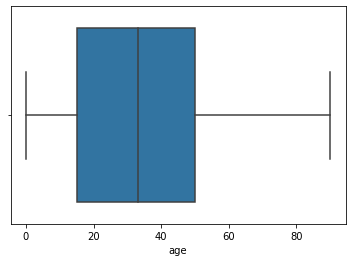

In [11]:
 ##checking the distribution of the age of people.
sns.boxplot(x='age', data=data) 

###### Insight: We see that the range of age of people in our dataset is from 0 to 80 and most of the population we will be analysing are between 20- 50 which makes sense, becasue that's when people are employed and start filing for taxes.

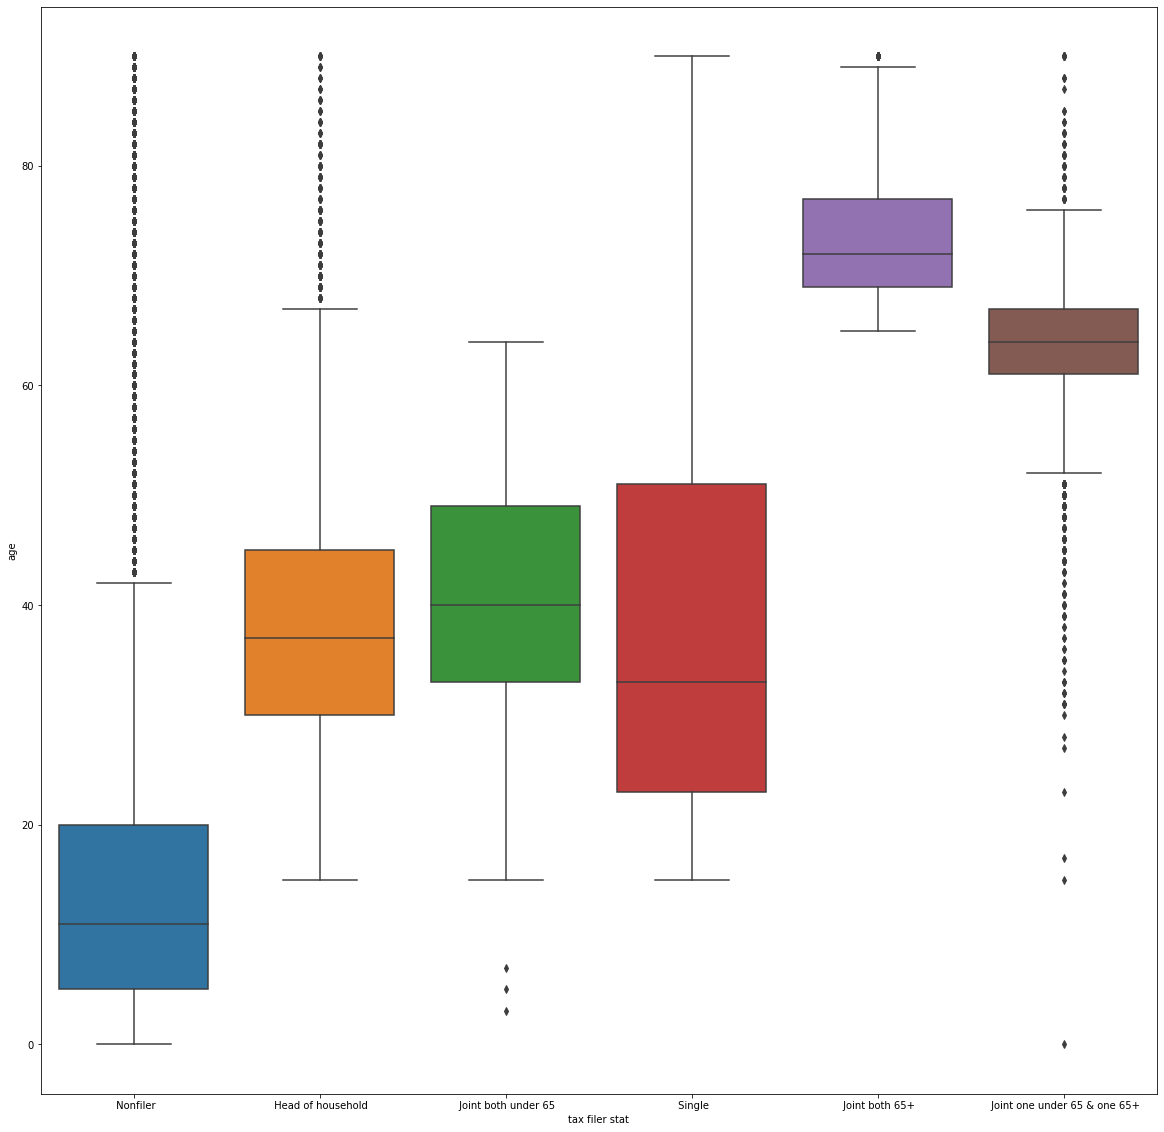

In [12]:
%matplotlib inline
plt.figure(figsize=(20,20))
fig1 = sns.boxplot(x="tax filer stat", y="age", data=data);

defaultdict(<class 'int'>, {' Widowed': 14, ' Never married': 291, ' Married-civilian spouse present': 26, ' Divorced': 9, ' Separated': 3, ' Married-spouse absent': 2})


<Figure size 2160x720 with 0 Axes>

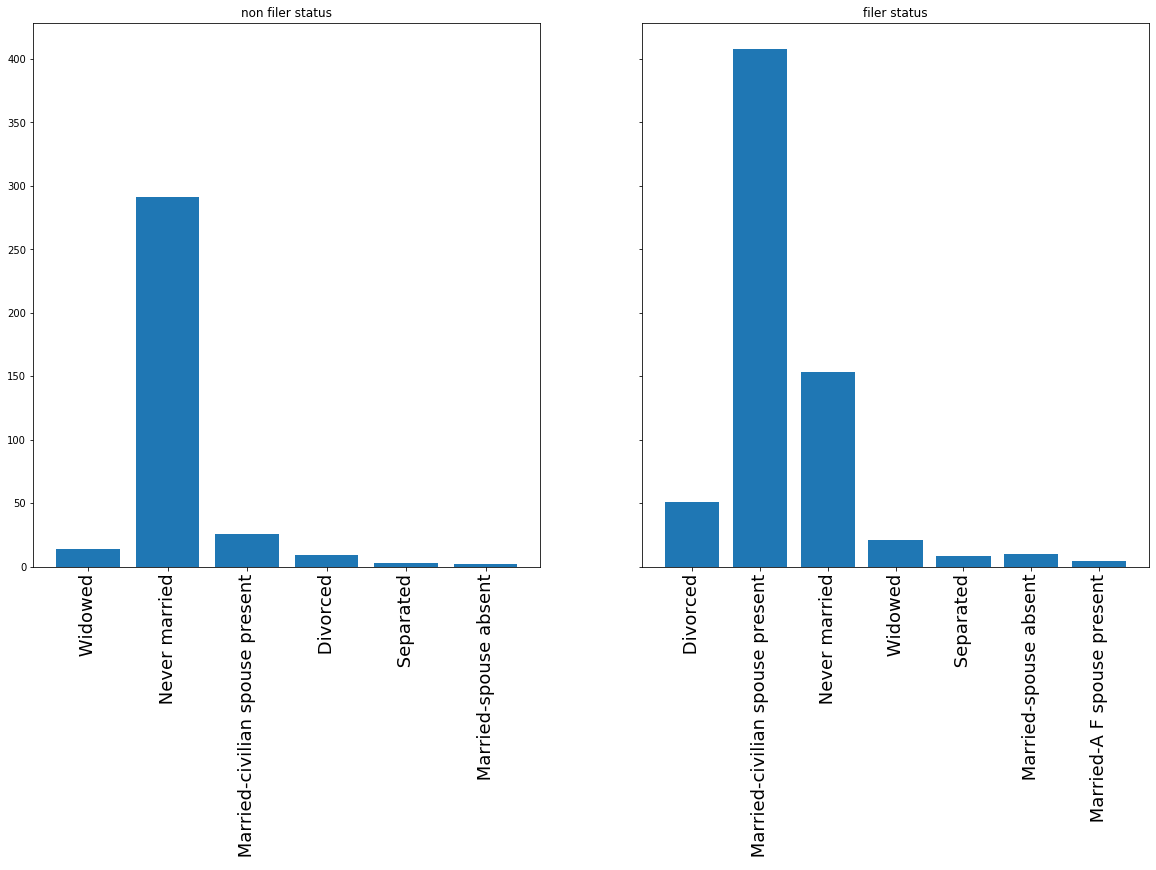

In [13]:
%matplotlib inline
plt.figure(figsize=(30,10))
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(20,10))
x=np.array(data['tax filer stat'])[:1000]
y=np.array(data['marital stat'])[:1000]
# print(x)
# plt.bar(x,y)
val=[]
val0=[]
for i in range(len(x)):
    if x[i]==' Nonfiler':
        val.append(1)
    else:
        val.append(0)

# print(val)
dict_val=defaultdict(int)
dict_val0=defaultdict(int)
for i in range(len(y)):
#     print(i)
    if val[i]==1:
        dict_val[y[i]]+=1
    else:
        dict_val0[y[i]]+=1

print(dict_val)
names=list(dict_val.keys())
names0=list(dict_val0.keys())
vals=list(dict_val.values())
vals0=list(dict_val0.values())
ax1.set_title('non filer status')
ax1.tick_params(axis='x',labelsize=18,labelrotation=90)
ax2.tick_params(axis='x',labelsize=18,labelrotation=90)
# ax1.xticks(x,)
# ax1.set_xticklabels(x_ticks, rotation=0, fontsize=8)
ax2.tick_params(labelsize=18)
ax2.set_title('filer status')
ax1.bar(names,vals)
ax2.bar(names0,vals0)

plt.show()
#tax filing status for non filers and filers grouped by marital status

###### Insights:
1. Tax filers are high among Married civilans which makes a lot of sense, if you own a family you think of security and future of the family and will not take risk of not having filed income tax
2. On the contrary side the highest of non filed cases belong to the never married category, which stregthens what we said above

<a id='ab23'></a>
## 3. Prepare data for Machine learning Algorithms

<a id='ab24'></a>
### 3.1 Data cleaning- checking for missing values

In [14]:
data = data.drop("instance weight",axis = 1)
#We need to drop instance weight as it is mentioned in the dataset description that it should be only used for real analysis and should be dropped for classification.

In [15]:
#As the missing values are reprsented as a string "?". The missing values are only in the categorical variables. Thus, imputing them with mode.

def fillna(df): ########### fill out the '?' with nan 
    for i in df:
   
        if str(i).find('migration')!=-1 or str(i).find('country')!=-1:
            counts=pd.Series((df[i])).value_counts()
    
            x=list(zip(*counts.iteritems()))[0]
    
            if x[0]=='?':
 
                val=x[1]
            else:
#                 print(x[1])
    
                val=x[0]
    
            df[i]=df[i].astype(str).str.replace('?',val)
            
    return df

In [16]:
Tdata=fillna(data)
Tdata.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [17]:
#Imputing all the nan's with their respective modes since all of the variables which contain '?' are categorical
data.head(5)
cat = ['migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago','migration prev res in sunbelt','family members under 18','country of birth father','country of birth mother','country of birth self']
for i in cat:
    data[i] = data[i].fillna(data[i].mode()[0])
    

In [18]:
data=fillna(data)

###### Insights:
1. Number of missing values 415717
2. Number of missing values 5.3%
3. Our missing values are represented by '?' in the data. Replacing '?' in the dataset with nan. As it is a string value
4. As the missing values are reprsented as a string "?". The missing values are only in the categorical variables. Thus, imputing them with mode


<a id='ab25'></a>
### 3.2 Handling categorical variables

In [19]:
#Tax Filer Status is our target variable
#As its a categorical vairable we would like to know the whether the person has filed the tax or not and then take the action accordingly. Here we are encoding Nonfiler as 1 and others as 0.
def encode_Y(y):
  encoded=[]    #### encoding the target variable
  for i in range(len(y)):
    if y[i]==" Nonfiler":
      encoded.append(1)
    else:
      encoded.append(0)
      
  return encoded

In [20]:
#Income is binned as either more or less than $50000,Thus encoding it
data['income']=data['income'].astype(str).str.replace('-50000','less') ### change the income column 
data['income']=data['income'].astype(str).str.replace('50000+','more')
data['income']=data['income'].astype(str).str.replace('50000+.','more')
print(data['income'])
for i in data.columns:
  if data[i].dtypes=='object' and i!='tax filer stat':
    le=LabelEncoder()
#     print(i)
    data[i]=le.fit_transform(data[i])

0         less
1         less
2         less
3         less
4         less
          ... 
199518    less
199519    less
199520    less
199521    less
199522    less
Name: income, Length: 199523, dtype: object


<a id='ab26'></a>
### 3.3 Scaling and splitting the dataset  

In [21]:
y=data['tax filer stat'].values
X=data.drop(columns='tax filer stat').values
print(np.shape(X))
print(np.shape(y))
# standardization=MinMaxScaler()


(199523, 40)
(199523,)


In [22]:
#### intiliazing the minmaxscaler object ### using min max scaler as it is faster than standard scaler
sc=MinMaxScaler()
y=encode_Y(y)

###### Insights : 
1. Tax Filer Status is our target variable 
2. As features like age, income and wage per hour are on different scales. Therefore, we need to scale our dataset. Thus, we are using the min-max scaler as it is faster than the standard scaler.
3. Income is binned as either more or less than $50000,Thus encoding it

In [23]:
from sklearn.model_selection import train_test_split
X=X[0:2000,:] ### taking a subset of the values to speed up the process as it is a really large dataset
y=y[0:2000]
xTrain, xTest, yTrain, yTest=train_test_split(X,y,test_size=0.25,random_state=1)  ### splitting into train and test set

In [24]:
scaler=sc.fit(xTrain)
xTest=scaler.transform(xTest)
xTrain=scaler.transform(xTrain)

###### Insights: We are also taking a random sample for our Train-Test split as its a really large dataset and the algorithm would run for a really long time. Thus I am sampling 2000 instances randomly from the dataset and then splitting them in to test and training sets.

<a id='ab27'></a>
## 4. Modeling- Selecting, triaining and optimizing 

<a id='ab28'></a>
### 4.1 K-Nearest Neighbor Classifier

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
tuned_parameters = [{'n_neighbors':[3,4,5,2,1]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(xTrain, yTrain)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    yPred = model.predict(xTest)
    print(classification_report(yTest, yPred))
    print()
    
    from sklearn.metrics import mean_squared_error
    print("MSE")
    print(mean_squared_error(yTest, yPred))
    
    from sklearn.metrics import roc_auc_score
    print("ROC_AUC_Score")
    print(roc_auc_score(yTest, yPred))
    
    from sklearn.metrics import confusion_matrix
    print('Confusion Matrix') 
    CM = confusion_matrix(yTest, yPred)
    print (CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    sensitivity = TP/(TP+FN)
    print('Sensitivity:' ,sensitivity)
    specificity = TN/(TN+FP)
    print('Specificity:' ,specificity)
        

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_neighbors': 4}

Grid scores on development set:

0.910 (+/-0.022) for {'n_neighbors': 3}
0.924 (+/-0.013) for {'n_neighbors': 4}
0.914 (+/-0.020) for {'n_neighbors': 5}
0.909 (+/-0.023) for {'n_neighbors': 2}
0.889 (+/-0.042) for {'n_neighbors': 1}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       326
           1       0.91      0.88      0.89       174

    accuracy                           0.93       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.93      0.93      0.93       500


MSE
0.072
ROC_AUC_Score
0.916649037444468
Confusion Matrix
[[311  15]
 [ 21 153]]
Sensitivity: 0.8793103448275862
Specificity: 0.9539877300613497
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'n_neighbors': 3}

Grid scores on development set:

0.901 (+/-0.03

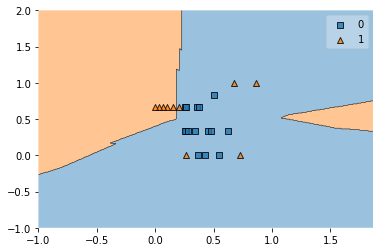

In [26]:
X=xTrain[100:125,[0,7]]
y=yTrain[100:125]
model=KNeighborsClassifier(4)
model.fit(X,y)
plot_decision_regions(X, np.array(y), clf = model)

###### Insights: 
1. After running grid search and cross-validation we have selected a model with 4 neighbors. 
2. Our Final Model has an accuracy of 93%, ROC_AUC score of 0.9166 and MSE of 0.072.

<a id='ab29'></a>
### 4.2 Logistic Regression

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'penalty':['none','l2'],'solver':['lbfgs','saga']}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(xTrain, yTrain)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    yPred = model.predict(xTest)
    print(classification_report(yTest, yPred))
    print()    
    from sklearn.metrics import mean_squared_error
    print("MSE")
    print(mean_squared_error(yTest, yPred))
    
    from sklearn.metrics import roc_auc_score
    print("ROC_AUC_Score")
    print(roc_auc_score(yTest, yPred))
    
    from sklearn.metrics import confusion_matrix
    print('Confusion Matrix') 
    print(confusion_matrix(yTest, yPred))
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    sensitivity = TP/(TP+FN)
    print('Sensitivity:' ,sensitivity)
    specificity = TN/(TN+FP)
    print('Specificity:' ,specificity)
        

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'penalty': 'none', 'solver': 'saga'}

Grid scores on development set:

0.927 (+/-0.026) for {'penalty': 'none', 'solver': 'lbfgs'}
0.930 (+/-0.024) for {'penalty': 'none', 'solver': 'saga'}
0.920 (+/-0.044) for {'penalty': 'l2', 'solver': 'lbfgs'}
0.922 (+/-0.044) for {'penalty': 'l2', 'solver': 'saga'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       326
           1       0.92      0.93      0.92       174

    accuracy                           0.95       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.95      0.95      0.95       500


MSE
0.054
ROC_AUC_Score
0.9411712855228828
Confusion Matrix
[[312  14]
 [ 13 161]]
Sensitivity: 0.9022988505747126
Specificity: 0.9294478527607362
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'penalty': '

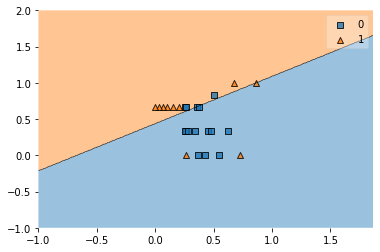

In [29]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
X=xTrain[100:125,[0,7]]
y=yTrain[100:125]
model=LogisticRegression(penalty='none',solver= 'saga')
model.fit(X,y)
plot_decision_regions(X, np.array(y), clf = model)

###### Insights :
1. The best logisitic model is the one with no regularization. 
2. It has MSE of 0.054, accuracy of 95% and ROC_AUC score of 0.9411

<a id='ab30'></a>
### 4.3 Linear Support vector Classifier

In [30]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(xTrain, yTrain)
print("Accuracy on training set: {:.3f}".format(linear_svm.score(xTrain, yTrain)))
print("Accuracy on test set: {:.3f}".format(linear_svm.score(xTest, yTest)))
print("Detailed classification report:")
print()
yPred=linear_svm.predict(xTest)
print(classification_report(yTest, yPred))
print()
from sklearn.metrics import mean_squared_error
print("MSE")
print(mean_squared_error(yTest, yPred))

from sklearn.metrics import roc_auc_score
print("ROC_AUC_Score")
print(roc_auc_score(yTest, yPred))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix') 
print(confusion_matrix(yTest, yPred))
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
sensitivity = TP/(TP+FN)
print('Sensitivity:' ,sensitivity)
specificity = TN/(TN+FP)
print('Specificity:' ,specificity)
        



Accuracy on training set: 0.938
Accuracy on test set: 0.944
Detailed classification report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       326
           1       0.92      0.92      0.92       174

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500


MSE
0.056
ROC_AUC_Score
0.9382977223044919
Confusion Matrix
[[312  14]
 [ 14 160]]
Sensitivity: 0.9022988505747126
Specificity: 0.9294478527607362


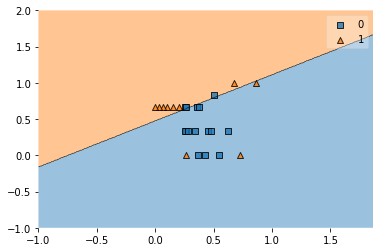

In [31]:
from sklearn.svm import LinearSVC

X=xTrain[100:125,[0,7]]
y=yTrain[100:125]
model=LinearSVC()
model.fit(X,y)
plot_decision_regions(X, np.array(y), clf = model)

###### Insights: 
1. It has MSE of 0.056, accuracy of 94% and ROC_AUC score of 0.938.

<a id='ab31'></a>
### 4.4 Support Vector Classifier

In [32]:
from sklearn.svm import SVC 
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [2,3,4,5],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
   
    print()

    model = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(xTrain, yTrain)

    print("Best parameters set found on development set:")
    
    print()
    
    print(model.best_params_)
    
    print()
    
    print("Grid scores on development set:")
    
    print()
    
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
    print()

    
    print("Detailed classification report:")
    
    print()
    
    yPred=model.predict(xTest)
    print(classification_report(yTest, yPred))
    print()
    
    from sklearn.metrics import mean_squared_error
    print("MSE")
    print(mean_squared_error(yTest, yPred))
    
    from sklearn.metrics import roc_auc_score
    print("ROC_AUC_Score")
    print(roc_auc_score(yTest, yPred))
    
    from sklearn.metrics import confusion_matrix
    print('Confusion Matrix') 
    print(confusion_matrix(yTest, yPred))
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    sensitivity = TP/(TP+FN)
    print('Sensitivity:' ,sensitivity)
    specificity = TN/(TN+FP)
    print('Specificity:' ,specificity)
        

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'degree': 2, 'kernel': 'poly'}

Grid scores on development set:

0.928 (+/-0.017) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.323 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.925 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.927 (+/-0.016) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.925 (+/-0.041) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.924 (+/-0.022) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.927 (+/-0.027) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.925 (+/-0.038) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.928 (+/-0.017) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.929 (+/-0.027) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.914 (+/-0.037) for {'C': 1, 'degree': 4, 'kernel': 'poly'}
0.922 (+/-0.027) for {'C': 1, 'degree': 5, 'kernel': 'poly'}
0.925 (+/-0.034) for {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.927 (+/-

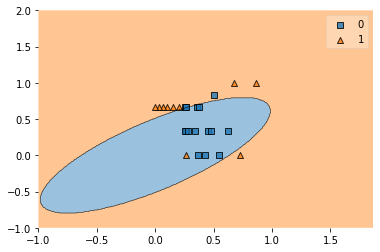

In [33]:
from sklearn.svm import SVC 
model=SVC(C=100, degree= 2, kernel= 'poly')
X=xTrain[100:125,[0,7]]
y=yTrain[100:125]
model.fit(X,y)
plot_decision_regions(X, np.array(y), clf = model)

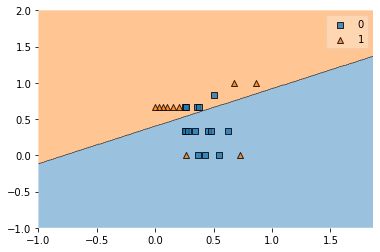

In [34]:
from sklearn.svm import SVC 
model=SVC(C=100, degree= 2, kernel= 'linear')
X=xTrain[100:125,[0,7]]
y=yTrain[100:125]
model.fit(X,y)
plot_decision_regions(X, np.array(y), clf = model)

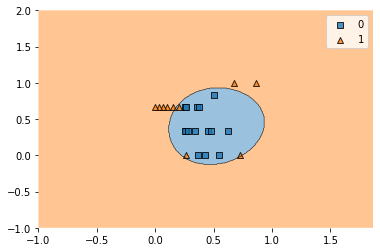

In [35]:
from sklearn.svm import SVC 
model=SVC(C=100, degree= 2, kernel= 'rbf')
X=xTrain[100:125,[0,7]]
y=yTrain[100:125]
model.fit(X,y)
plot_decision_regions(X, np.array(y), clf = model)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend(fontsize=10)

###### Insights :
1. We can say that after grid search we have selected the SVC with Regularization parameter (C) = 100 degree = 2 and kernel=Polynomial. 
2. It has MSE of 0.056, ROC_AUC score of 0.938 and an accuracy of 94%.

In [36]:
import warnings
warnings.filterwarnings("default")

<a id='ab32'></a>
### 4.5 Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
tuned_parameters = [{'max_depth':[10,12,13,14]}] 
scores = ['precision', 'recall']

for score in scores:
    print('Scoring Parameter', score)
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(xTrain, yTrain)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    yPred = model.predict(xTest)
    print(classification_report(yTest, yPred))
    print()
    
        
    from sklearn.metrics import mean_squared_error
    print("MSE")
    print(mean_squared_error(yTest, yPred))
    
    from sklearn.metrics import roc_auc_score
    print("ROC_AUC_Score")
    print(roc_auc_score(yTest, yPred))
    
    from sklearn.metrics import confusion_matrix
    print('Confusion Matrix') 
    print(confusion_matrix(yTest, yPred))
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    sensitivity = TP/(TP+FN)
    print('Sensitivity:' ,sensitivity)
    specificity = TN/(TN+FP)
    print('Specificity:' ,specificity)
        

c:\users\vishal\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


Scoring Parameter precision
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 10}

Grid scores on development set:

0.919 (+/-0.023) for {'max_depth': 10}
0.915 (+/-0.014) for {'max_depth': 12}
0.917 (+/-0.033) for {'max_depth': 13}
0.914 (+/-0.024) for {'max_depth': 14}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       326
           1       0.91      0.93      0.92       174

    accuracy                           0.94       500
   macro avg       0.93      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500


MSE
0.058
ROC_AUC_Score
0.938103800860306
Confusion Matrix
[[310  16]
 [ 13 161]]
Sensitivity: 0.9022988505747126
Specificity: 0.9294478527607362
Scoring Parameter recall
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'max_depth': 13}

Grid scores on development set:

0.892 (

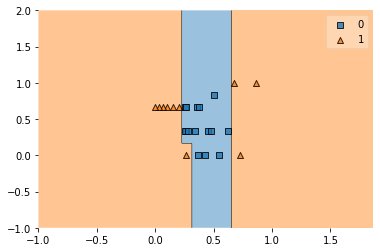

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=10)
X=xTrain[100:125,[0,7]]
y=yTrain[100:125]
model.fit(X,y)
plot_decision_regions(X, np.array(y), clf = model)

###### Insights: 
1. After grid search and cross validation we have come at a conclusion that the dept of the tree is 10. 
2. It has an accuracy of 94%, MSE of 0.056 and AUC_ROC score of 0.9396.

<a id='ab33'></a>
### 4.6 Feature importance using Decision Tree

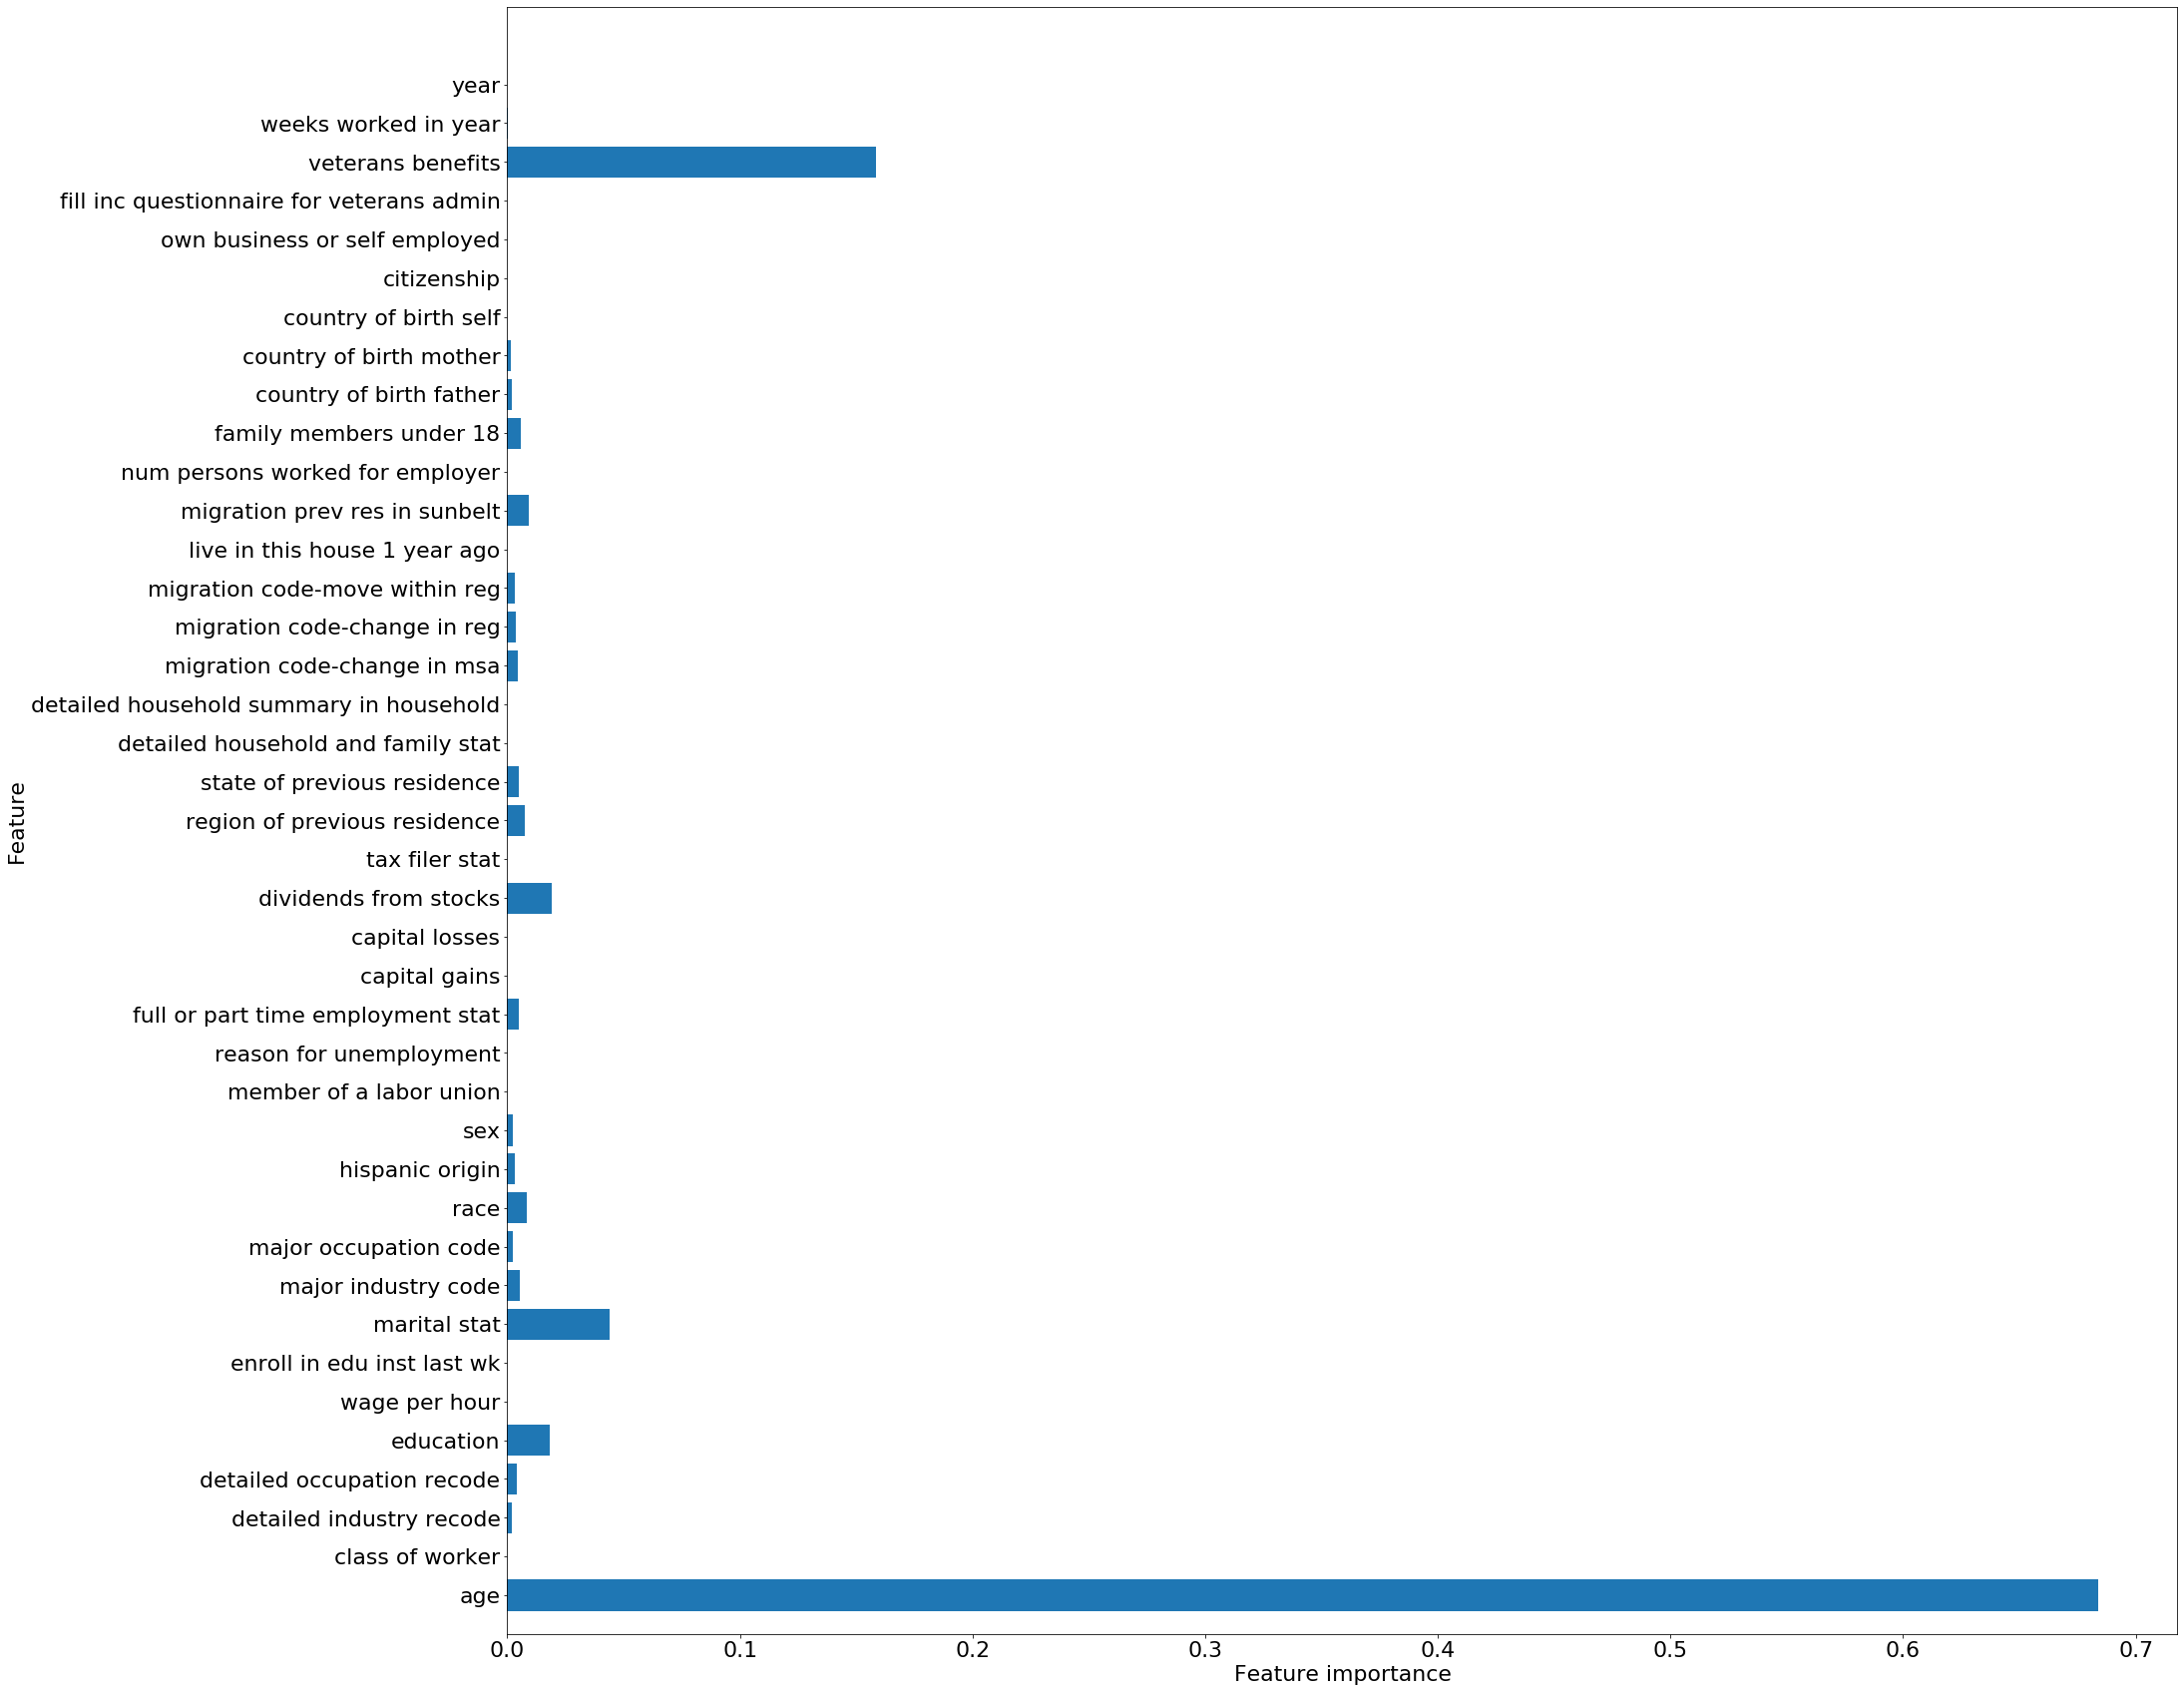

In [39]:
%matplotlib inline
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(xTrain, yTrain)
temp=data
temp=np.array(temp)
n_features=np.shape(temp)[1]
# print(n_features)
# print(data.describe)
def plot_feature_importances(model):
#     n_features = data.data.shape[1]
    plt.figure(figsize=(30,30))
    plt.rcParams.update({'font.size': 22})
    plt.barh(range(n_features-1), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features-1), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances(model)

###### Insights: 
1. According to the Horizontal bar chart we can see that age is the most important feature followed by veteran benefits, marital status, education, dividends from stocks which all makes sense when we think about filing a tax income

<a id='ab34'></a>
## 5. Results and model evaluation 


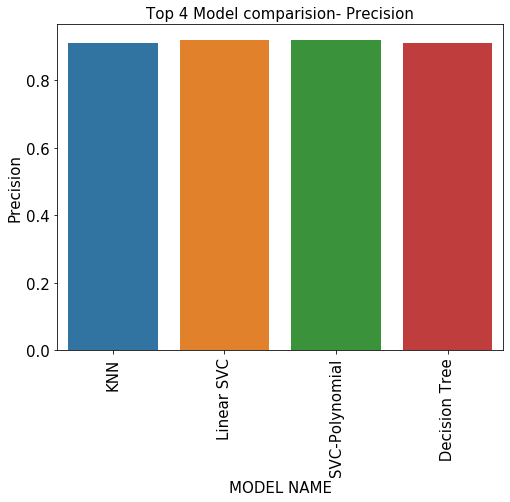

In [40]:
purchase_1 = pd.Series({'Model': 'KNN',
                        'Precision': 0.91,
                        'ROC':0.9166})
purchase_2 = pd.Series({'Model': 'Logistic',
                        'Precision': 0.92,
                        'ROC': 0.9411,
                        })

purchase_3 = pd.Series({'Model': 'Linear SVC',
                        'Precision': 0.92,
                        'ROC':0.938
                        })
purchase_4 = pd.Series({'Model': 'SVC-Polynomial',
                        'Precision': 0.92,
                        'ROC':0.9398
                        })
purchase_5 = pd.Series({'Model': ' Decision Tree',
                        'Precision': 0.91,
                        'ROC':0.9396
                        })



df = pd.DataFrame([purchase_1, purchase_3,purchase_4,purchase_5], index=['Store 1', 'Store 3','S4','S5'])
df.head()

plt.figure(figsize=(8,6))
sns.barplot(x=df.Model,y=df.Precision)
plt.xlabel('MODEL NAME',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.title('Top 4 Model comparision- Precision',fontsize=15)
plt.xticks(rotation='90',fontsize=15)
plt.yticks(fontsize=15)
plt.show()

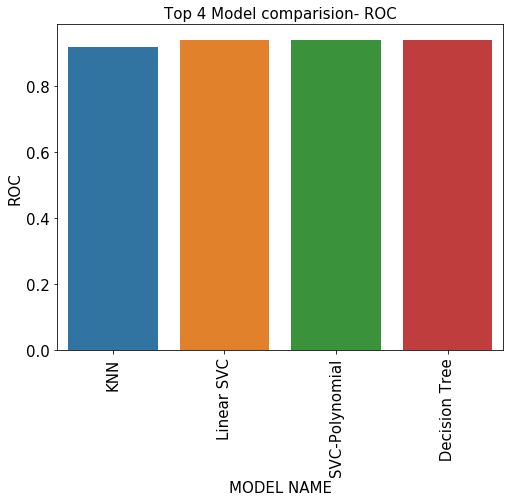

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x=df.Model,y=df.ROC)
plt.xlabel('MODEL NAME',fontsize=15)
plt.ylabel('ROC',fontsize=15)
plt.title('Top 4 Model comparision- ROC',fontsize=15)
plt.xticks(rotation='90',fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<a id='ab34'></a>
### 5.1 Final Model Selection & evaluation strategy:
The goal of our project is to detect the non tax filers so that the government or the financial instittutions can take the remedial action. They are encoded as '1' in the model. Thus, we would be using precision as an evaluation metric as precision tell us about the positive predictive value. The greater number of people who are correctly classified as non filers translates into a greater precision score. For our Models there is tie between Logistic, Linear SVC and SVC with C =100, Degree = 2 and Kernel = Polynomial. Thus, as a tie breaker I am going to use ROC_AUC score. As, AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes. Thus, it defines how well our model is separating the classes. A higher ROC_AUC score denotes a greater separation and a better classification. Thus, on the basis of precision and then ROC_AUC score we can say that the Logistic Regression is the best classifier in the current situation. As it has the highest Precision as well as the ROC_AUC score.

<a id='ab35'></a>
### 5.2. Scope of Improvement:
We can use ensemble methods to improve classificaton scores. Especially models like Random Forests and Gradient Boosting.
To improve the models we could also use Principal Component Analysis or Canonical Component Analysis in pre-processing that would help us for dimension reduction and help our models to converge faster.